<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [3]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [4]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [5]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [6]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [7]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [8]:
EleData.describe()

order_id  order_item_id          units            sla  \
count  4.277750e+05   4.277750e+05  427775.000000  427775.000000   
mean   2.845230e+15   1.321295e+16       1.021941       5.469492   
std    1.268358e+15   5.458201e+16       0.222356       2.658440   
min    1.528676e+08   2.072001e+08       1.000000       0.000000   
25%    1.600075e+15   1.603993e+15       1.000000       4.000000   
50%    2.611817e+15   2.618906e+15       1.000000       5.000000   
75%    3.610341e+15   4.397844e+15       1.000000       7.000000   
max    4.641665e+15   3.000373e+17      19.000000      60.000000   

         product_mrp  product_procurement_sla  
count  427775.000000            427775.000000  
mean     8297.878123                 2.578220  
std     13781.504587                 1.960068  
min         0.000000                -1.000000  
25%       900.000000                 1.000000  
50%      2000.000000                 2.000000  
75%      6900.000000                 3.000000  
max    280000.000000                15.000000

In [9]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [10]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [11]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [12]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [13]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [14]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [15]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp

EleData=EleData[(EleData.gmv!='')]
EleData.gmv=EleData.gmv.astype(float)

In [16]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  float64       
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [17]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [18]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [19]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [20]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [21]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<20000)[EleData.product_analytic_vertical.value_counts()<20000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [22]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [23]:
## product MRP
EleData.product_mrp.astype(float)


1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 395657, dtype: float64

# Data Analysis and feature extraction

In [24]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [25]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


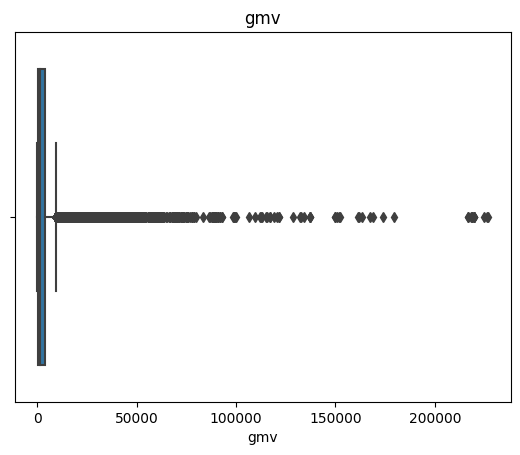

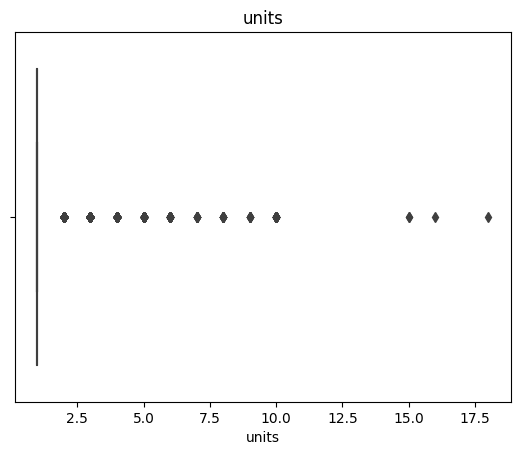

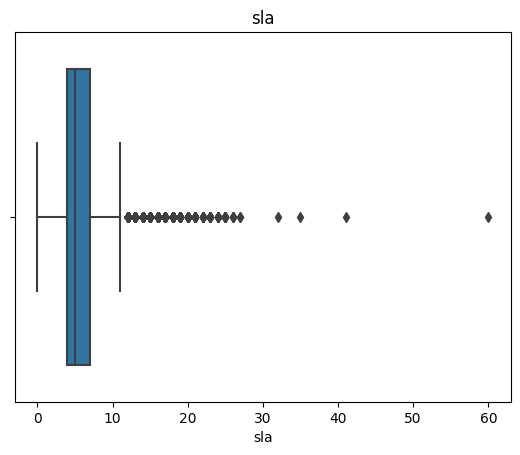

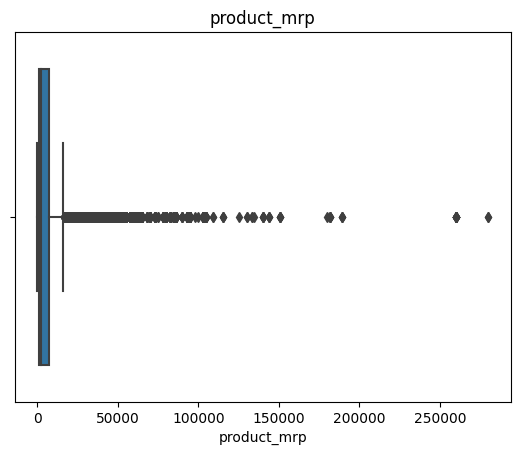

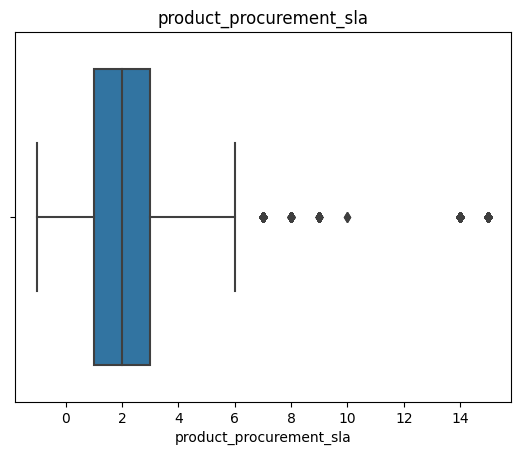

In [26]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')

x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

## we will treat outliers later based on sub categories

In [27]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [28]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [29]:
# 2. Listing Price and Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [30]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [31]:
# ## Sales
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

# SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["sale_date"])

# SalesCal1=SalesCal1[0].to_list()
# SalesCal1
EleData2.order_date=EleData2.order_date.apply(lambda x :str(x).strip())
EleData2=pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='sale_date',how='left')
# # test[~test["date"].isna()]
# EleData2['sale_date'].value_counts()

In [32]:
### Weather infomation canada
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date
weekly_kpis=Ont_Weather.groupby('week').mean().reset_index()

In [33]:
weekly_kpis.head()
weekly_kpis.drop(['Year','Month'],1,inplace=True)

In [34]:

weekly_kpis=weekly_kpis.sort_values(by='week')
Ont_Weather.info()
weekly_kpis.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
weekly_kpis.ffill(inplace=True)
weekly_kpis.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


week           0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
dtype: int64

In [35]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


Header   Month1        Value Month  Year
0           NPS  July'15    54.599588     7  2015
1   Stock Index  July'15  1177.000000     7  2015
2           NPS   Aug'15    59.987101     8  2015
3   Stock Index   Aug'15  1206.000000     8  2015
4           NPS  Sept'15    46.925419     9  2015
5   Stock Index  Sept'15  1101.000000     9  2015
6           NPS   Oct'15    44.398389    10  2015
7   Stock Index   Oct'15  1210.000000    10  2015
8           NPS   Nov'15    47.000000    11  2015
9   Stock Index   Nov'15  1233.000000    11  2015
10          NPS   Dec'15    45.800000    12  2015
11  Stock Index   Dec'15  1038.000000    12  2015
12          NPS   Jan'16    47.093031     1  2016
13  Stock Index   Jan'16  1052.000000     1  2016
14          NPS   Feb'16    50.327406     2  2016
15  Stock Index   Feb'16  1222.000000     2  2016
16          NPS   Mar'16    49.020550     3  2016
17  Stock Index   Mar'16  1015.000000     3  2016
18          NPS   Apr'16    51.827605     4  2016
19  Stock Index   Apr'16  1242.000000     4  2016
20          NPS   May'16    47.306951     5  2016
21  Stock Index   May'16  1228.000000     5  2016
22          NPS  June'16    50.516687     6  2016
23  Stock Index  June'16  1194.000000     6  2016

In [36]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [37]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
# EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [38]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year'],
      dtype='object')

In [39]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [40]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [41]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [42]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')



In [43]:
## aDstock
# EleData3.columns
# considering 0.5 decay
ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [44]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [45]:
Inv2['week']=nm.arange(1,54)
weekly_kpis=pd.merge(weekly_kpis,Inv2,on='week')

In [46]:
## Pay Date 1st and 15th
EleData2.order_date=pd.to_datetime(EleData2.order_date).dt.date
EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15)|(pd.to_datetime(x).is_month_end) else 0)


In [47]:
# holiday flag
import holidays
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_flag  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [48]:
EleData3=pd.merge(EleData2,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [49]:
## payment type
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)


In [50]:
EleData3.pay_date_flag.value_counts()

0    362012
1     23984
Name: pay_date_flag, dtype: int64

In [51]:
EleData3.product_analytic_sub_category.value_counts()

gamingaccessory    181539
homeaudio          109751
camera              94706
Name: product_analytic_sub_category, dtype: int64

# Data Aggregation and analysis

Camera Analysis

In [52]:
##
camera=EleData3[EleData3.product_analytic_sub_category=='camera']
# camera.discount_per

In [53]:
camera.drop(["product_analytic_sub_category","product_analytic_category"],1,inplace=True)

In [54]:
num
num.append('discount_per')
num.append('listing_price')

In [55]:
camera[num].describe()

gmv         units           sla    product_mrp  \
count   94706.000000  94706.000000  94706.000000   94706.000000   
mean    17774.221234      1.011816      4.694370   27114.656505   
std     11423.619524      0.143116      2.399058   16922.490081   
min         0.000000      1.000000      0.000000     599.000000   
25%      6599.000000      1.000000      3.000000    8000.000000   
50%     19490.000000      1.000000      4.000000   34950.000000   
75%     24990.000000      1.000000      6.000000   40000.000000   
max    226947.000000      9.000000     35.000000  280000.000000   

       product_procurement_sla  discount_per  listing_price  
count             94706.000000  94706.000000   94706.000000  
mean                  2.777754      0.321185   17615.696167  
std                   2.490936      0.133102   11240.653746  
min                  -1.000000      0.000000       0.000000  
25%                   1.000000      0.210000    6552.000000  
50%                   3.000000      0.350000   19490.000000  
75%                   4.000000      0.430000   24990.000000  
max                  15.000000      1.000000  226947.000000

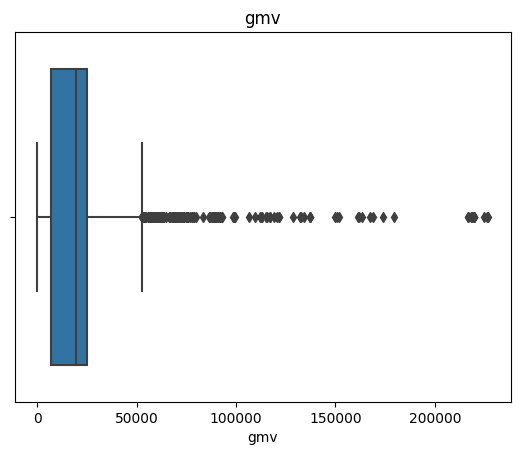

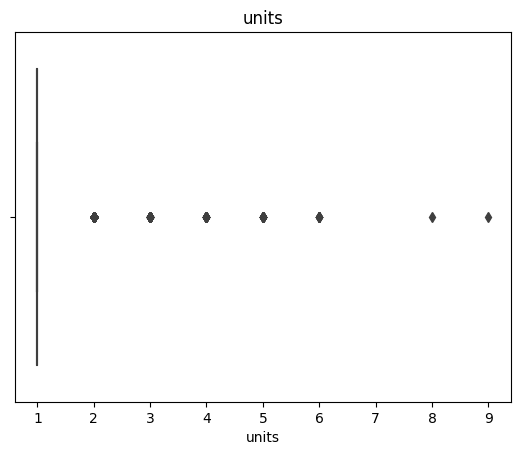

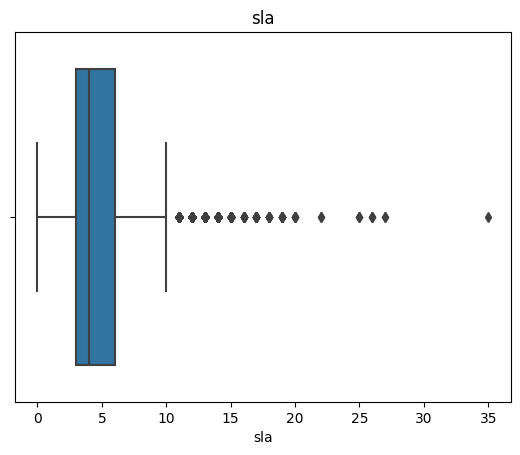

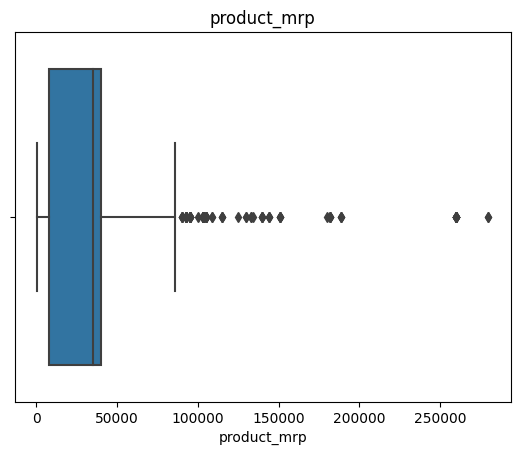

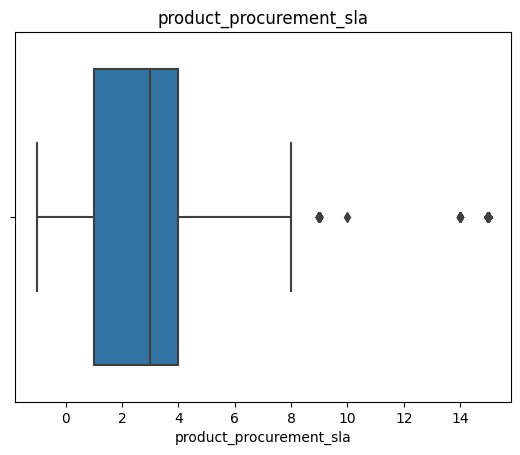

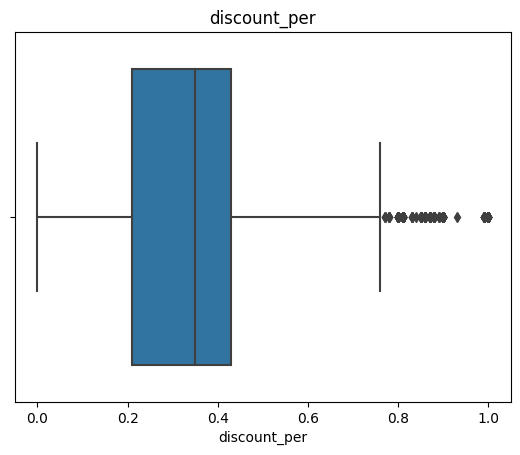

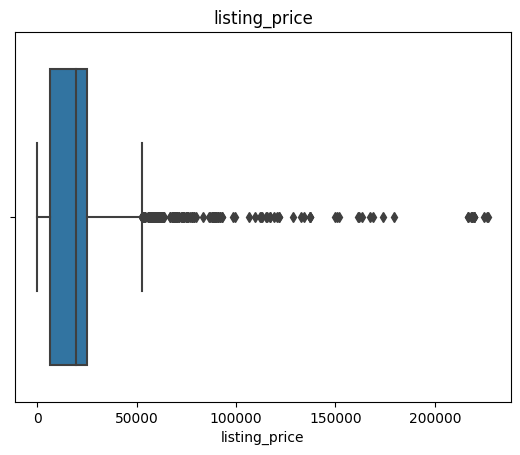

In [56]:
for i in num:
  sns.boxplot(x=camera[i])
  plt.title(i)
  plt.show()

In [57]:
q1=camera['product_mrp'].quantile(0.25)
q3=camera['product_mrp'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['product_mrp']>112000]
camera.loc[camera['product_mrp']>112000,'product_mrp']=up
camera.loc[camera['product_mrp']<-64000,'product_mrp']=lw

-64000.0   112000.0


In [58]:
q1=camera['gmv'].quantile(0.25)
q3=camera['gmv'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['gmv']>72373.5]
camera.loc[camera['gmv']>72373.5,'gmv']=up
camera.loc[camera['gmv']<-40784.5,'gmv']=lw

-40784.5   72373.5


In [59]:
q1=camera['listing_price'].quantile(0.25)
q3=camera['listing_price'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['listing_price']>72373.5]
camera.loc[camera['listing_price']>72303.0,'listing_price']=up
camera.loc[camera['listing_price']<-40761.0,'listing_price']=lw

-40761.0   72303.0


In [60]:
camera['product_mrp'].describe()

count     94706.000000
mean      27081.116909
std       16634.542524
min         599.000000
25%        8000.000000
50%       34950.000000
75%       40000.000000
max      112000.000000
Name: product_mrp, dtype: float64

In [61]:
q1=camera['discount_per'].quantile(0.25)
q3=camera['discount_per'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['discount_per']>1.39]
q1=camera['sla'].quantile(0.25)
q3=camera['sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['sla']>19.5,'sla']=up
camera.loc[camera['sla']<-10.5,'sla']=lw
q1=camera['product_procurement_sla'].quantile(0.25)
q3=camera['product_procurement_sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['product_procurement_sla']>11.5,'product_procurement_sla']=up
camera.loc[camera['product_procurement_sla']<-6.5,'product_procurement_sla']=lw

-0.75   1.39
-10.5   19.5
-6.5   11.5


In [62]:
camera.describe()

order_item_id           gmv         units  order_payment_type  \
count   9.470600e+04  94706.000000  94706.000000        94706.000000   
mean    6.703434e+15  17727.839389      1.011816            0.549226   
std     3.342070e+16  11004.714008      0.143116            0.497574   
min     2.106577e+08      0.000000      1.000000            0.000000   
25%     1.611128e+15   6599.000000      1.000000            0.000000   
50%     2.626900e+15  19490.000000      1.000000            1.000000   
75%     3.641208e+15  24990.000000      1.000000            1.000000   
max     3.000373e+17  72373.500000      9.000000            1.000000   

                sla    product_mrp  product_procurement_sla          week  \
count  94706.000000   94706.000000             94706.000000  94706.000000   
mean       4.693583   27081.116909                 2.743754     29.332893   
std        2.392909   16634.542524                 2.343432     12.712539   
min        0.000000     599.000000                -1.000000      1.000000   
25%        3.000000    8000.000000                 1.000000     19.000000   
50%        4.000000   34950.000000                 3.000000     29.000000   
75%        6.000000   40000.000000                 4.000000     40.000000   
max       19.500000  112000.000000                11.500000     53.000000   

       listing_price  discount_per   Stock_Index           NPS  pay_date_flag  
count   94706.000000  94706.000000  94706.000000  94706.000000   94706.000000  
mean    17570.431538      0.321185   1152.824288     47.874215       0.051517  
std     10822.070272      0.133102     87.294832      2.588455       0.221052  
min         0.000000      0.000000   1015.000000     44.398389       0.000000  
25%      6552.000000      0.210000   1052.000000     45.800000       0.000000  
50%     19490.000000      0.350000   1210.000000     47.093031       0.000000  
75%     24990.000000      0.430000   1228.000000     50.327406       0.000000  
max     72303.000000      1.000000   1242.000000     59.987101       1.000000

In [230]:
camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')

camera_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

In [231]:
camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

In [232]:
camera_wk.head()

week  order_item_id         gmv  units  order_payment_type   sla  \
0     1            183   1683100.0    187                 126  5.00   
1     2            866  10726820.5    871                 527  4.83   
2     3           1053  14527023.0   1065                 620  4.32   
3     4            849  11893556.5    856                 533  4.33   
4     5            373   4812133.0    380                 243  4.16   

   product_mrp  product_procurement_sla  listing_price  discount_per  ...  \
0      2075447                     2.71      1660644.0         50.14  ...   
1     13665461                     2.74     10695536.0        218.17  ...   
2     18871251                     2.71     14462593.0        223.39  ...   
3     15014935                     2.44     11859463.0        165.17  ...   
4      6130674                     2.37      4760935.0         82.01  ...   

   total_snow  Total_Investment_AD  TV_AD  Digital_AD  Content_Marketing_AD  \
0         0.0                 4.27   0.05        0.63                   0.0   
1         0.0                 6.40   0.08        0.95                   0.0   
2         0.0                 6.40   0.08        0.95                   0.0   
3         0.0                 6.40   0.08        0.95                   0.0   
4         0.0                 3.15   0.03        0.57                   0.0   

   Online_marketing_AD  Affiliates_AD  SEM_AD  Radio_AD  Other_AD  
0                 0.33           0.14    1.26       0.0       0.0  
1                 0.50           0.21    1.88       0.0       0.0  
2                 0.50           0.21    1.88       0.0       0.0  
3                 0.50           0.21    1.88       0.0       0.0  
4                 0.19           0.08    1.13       0.0       0.0  

[5 rows x 29 columns]

In [233]:
camera_wk.order_payment_type.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [234]:
camera_wk.num_of_sales=camera_wk.num_of_sales-1
# camera_wk.head()

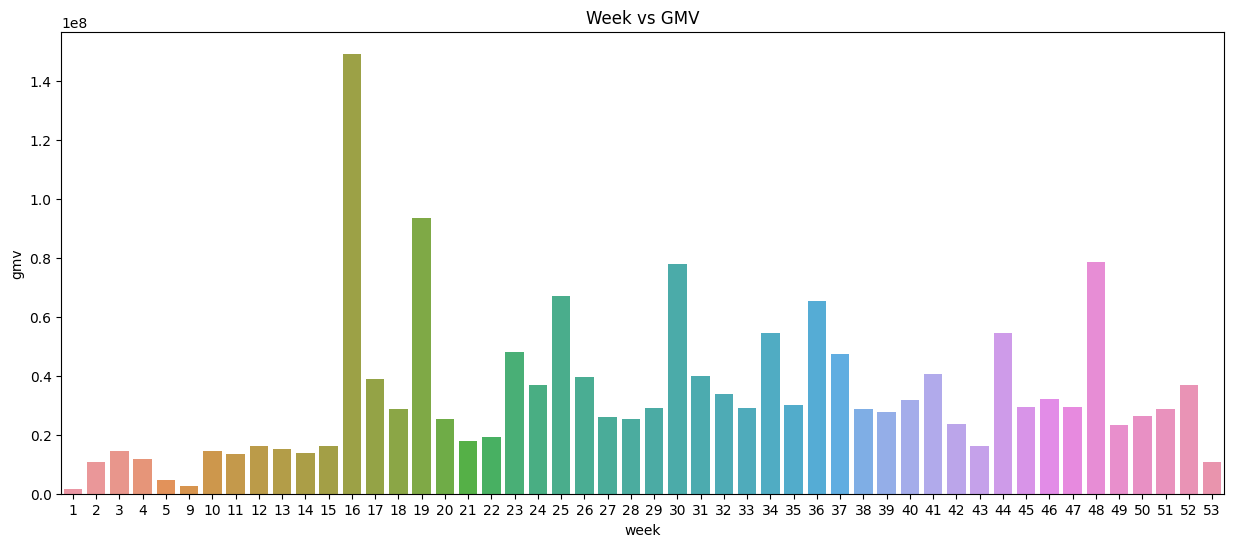

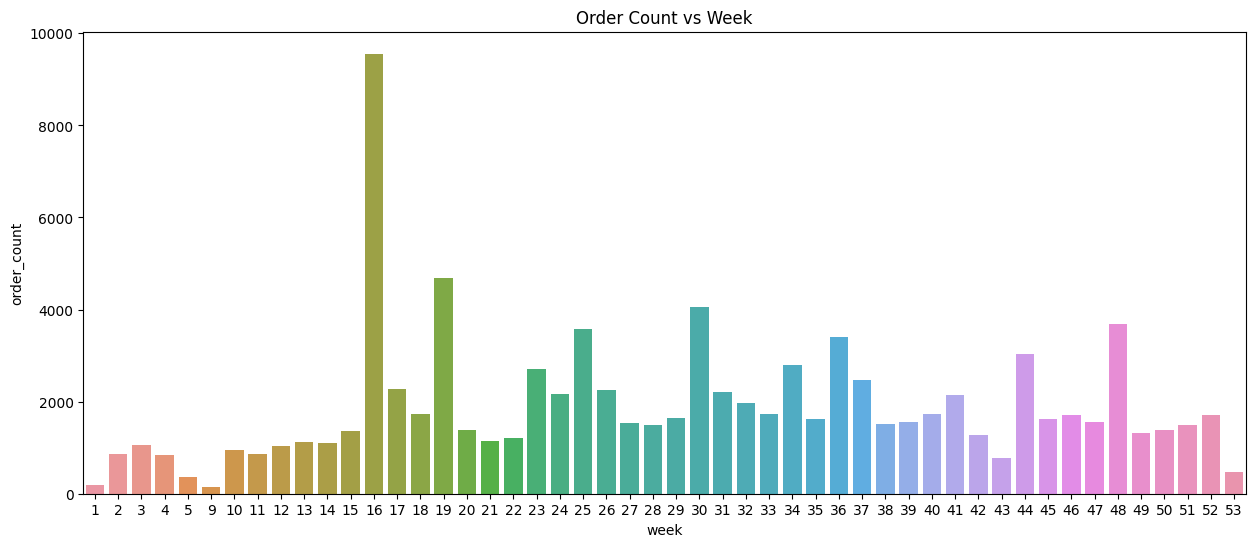

In [235]:


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
# On an avverage 3 sales a week giving better result


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['order_count'])
plt.title("Order Count vs Week")
plt.show()

## On week 16 , 19, 25, 30,36,44 and 48 sales was good

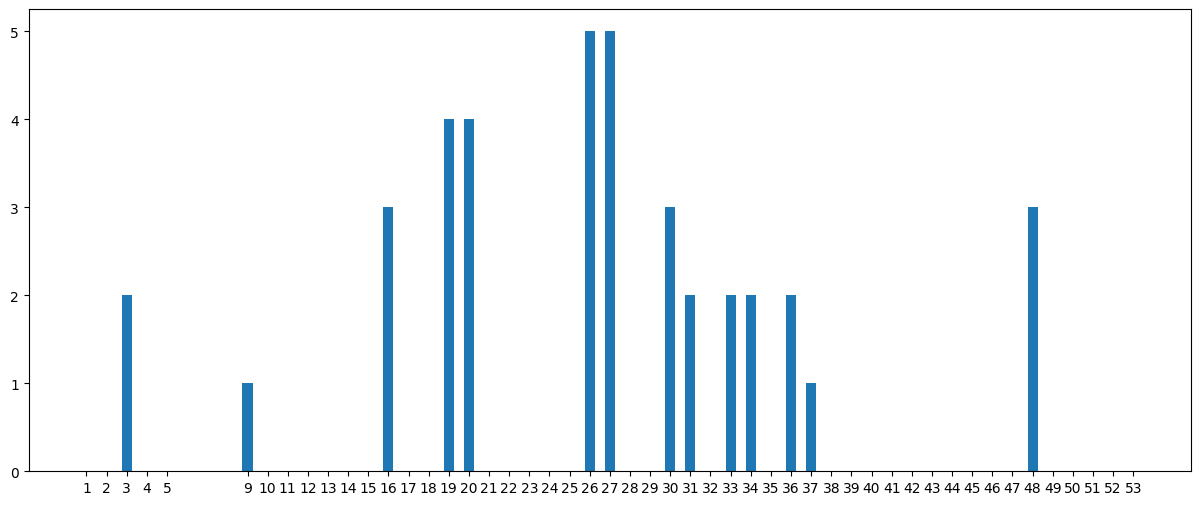

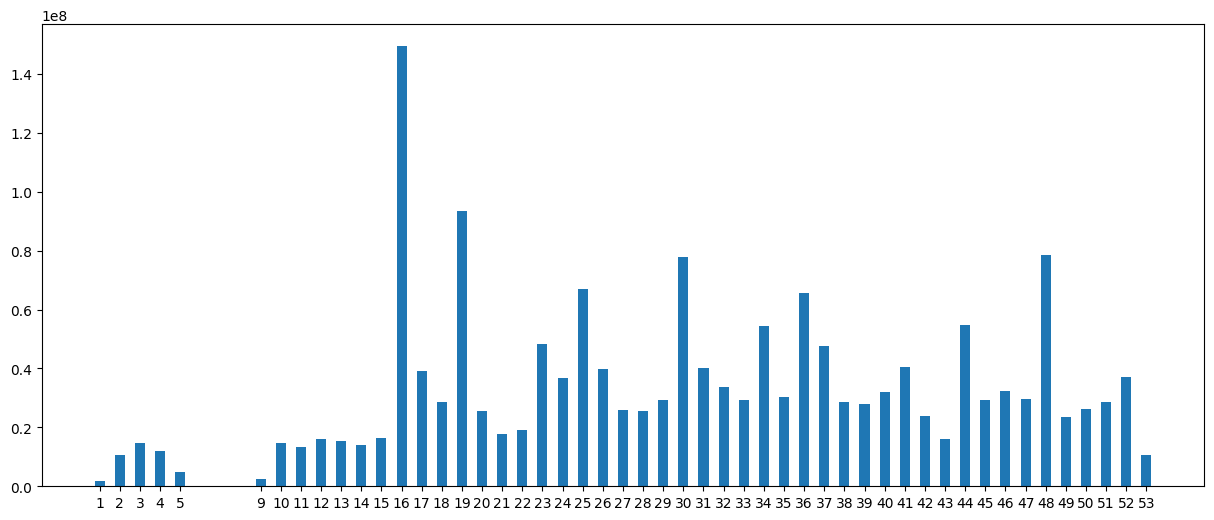

In [236]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=camera_wk['week'],height=camera_wk['num_of_sales'],width=width)
plt.xticks(camera_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['gmv'],width=width)
plt.xticks(camera_wk['week'])
plt.show()

##  week 16th had 3 days of sale and it improved its gmv, similarly for week 48, 19 and 30
# But in Week 26 27 5 days were sale days bt id didnt improve the GMV much

# Week 16, 19 , 30 , 34,36 and 48 : has impact because has good gmv and number of sales

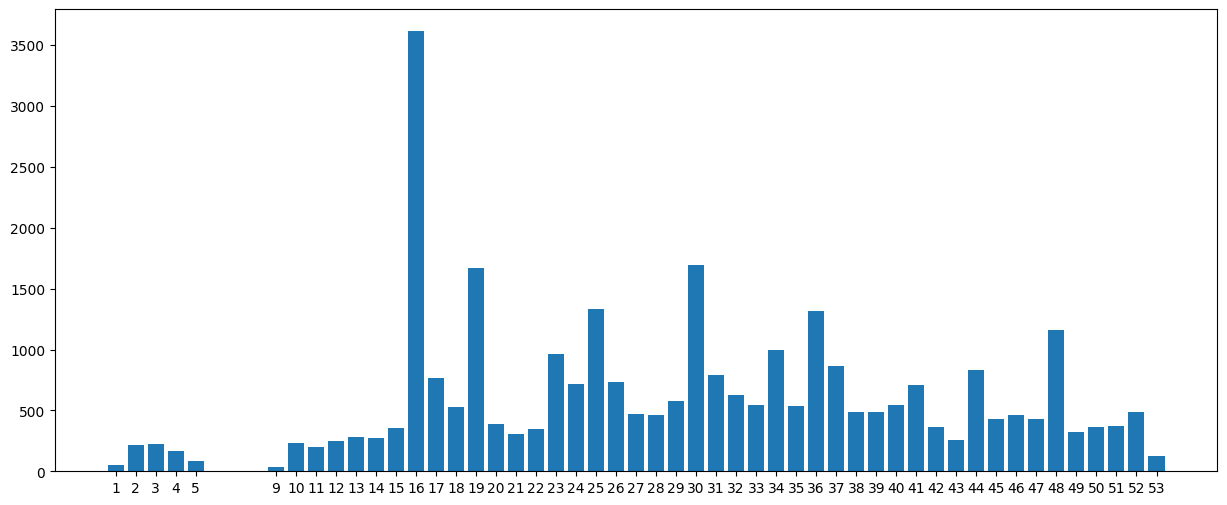

In [237]:
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['discount_per'])
plt.xticks(camera_wk['week'])
plt.show()

### Now week 25th may not have any sale but disocunts were given for most items and hence GMV was improved which makes sense

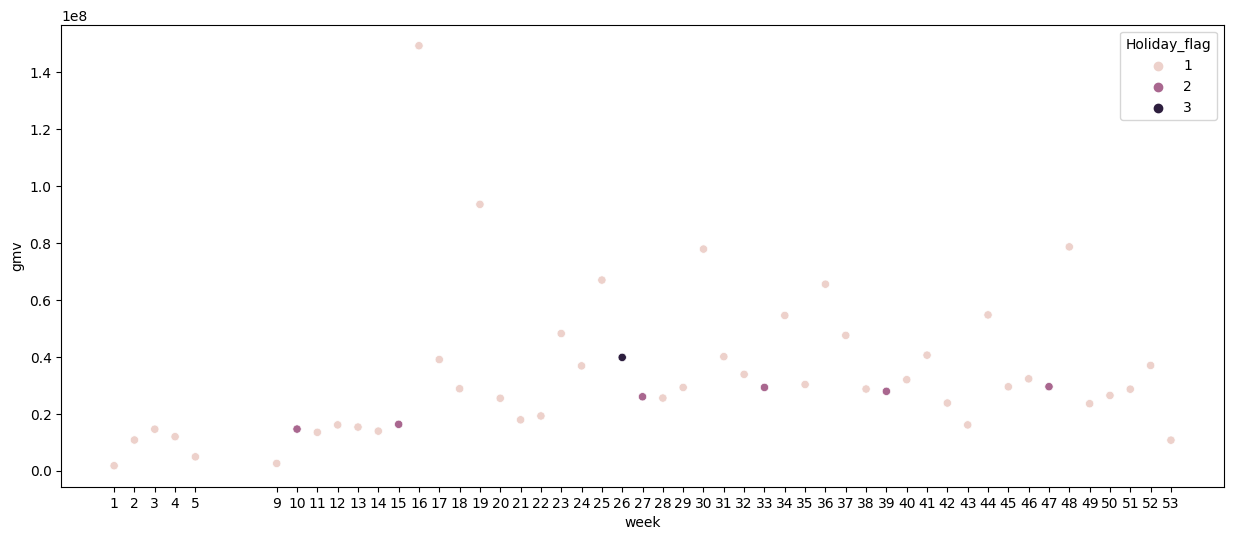

In [242]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['Holiday_flag'])
plt.xticks(camera_wk['week'])
plt.show()

# Week 26, 15, 27 33 39 47


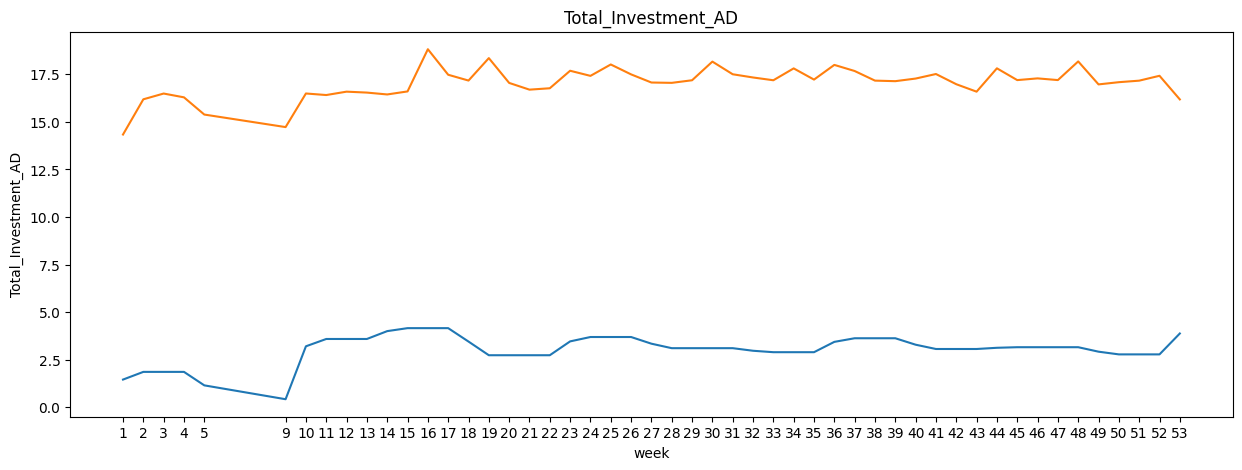

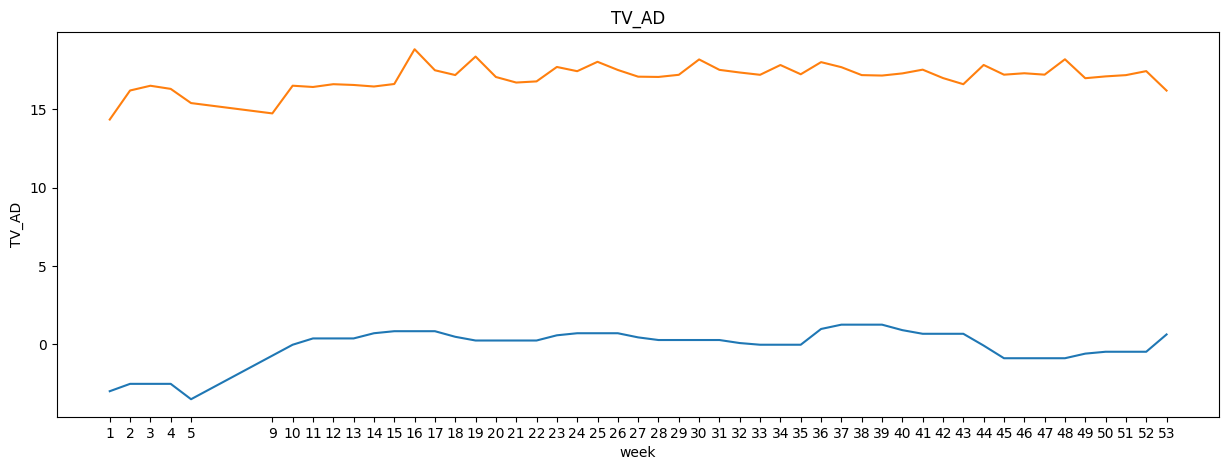

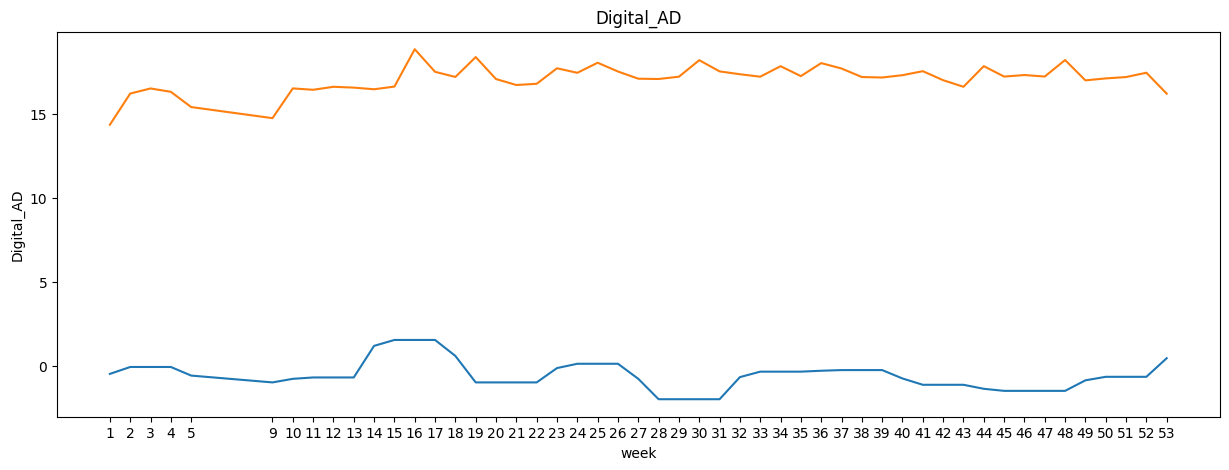

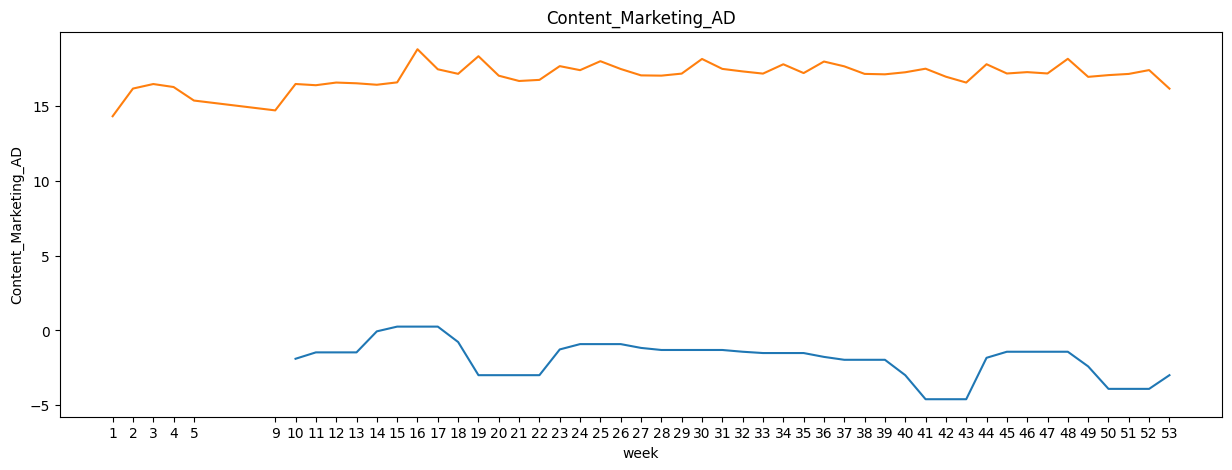

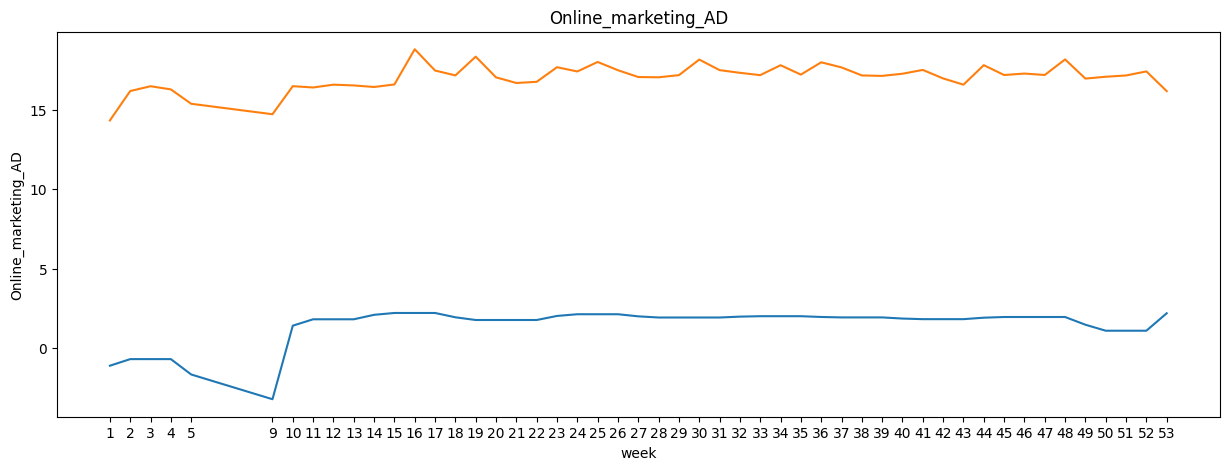

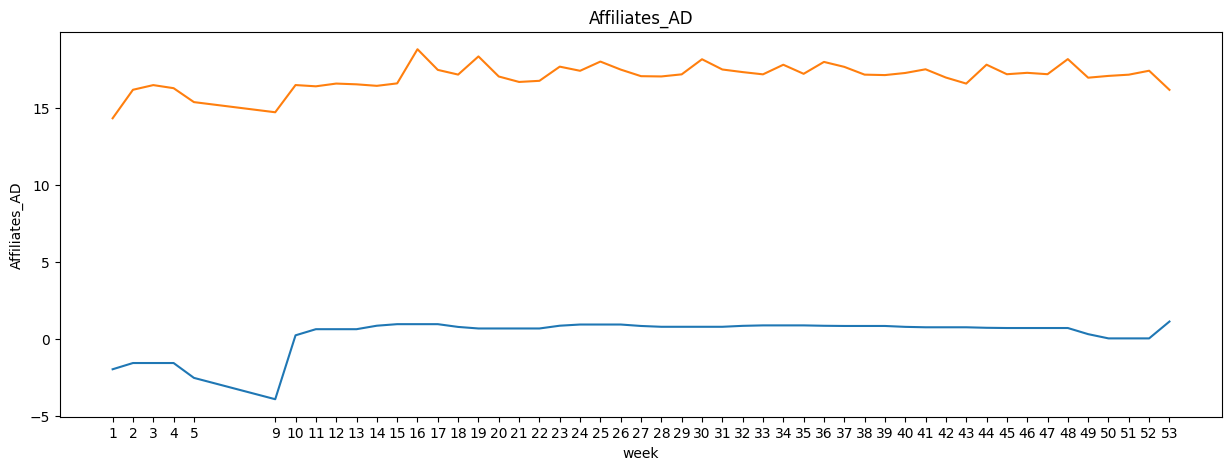

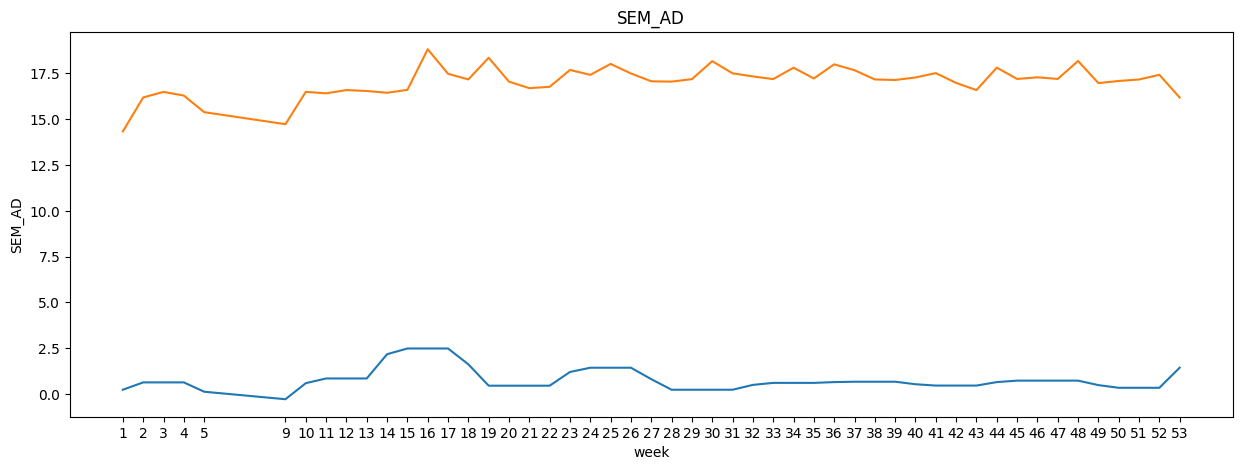

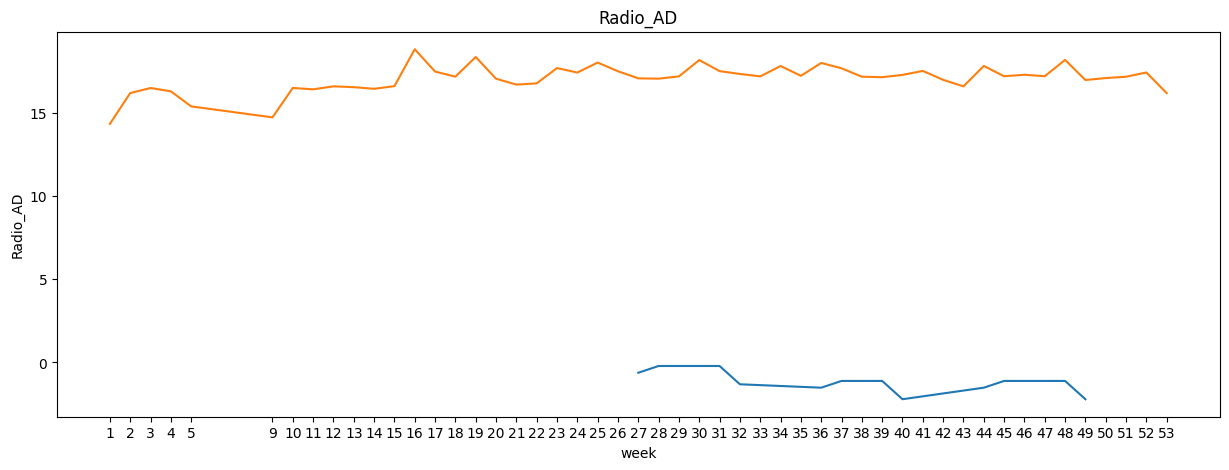

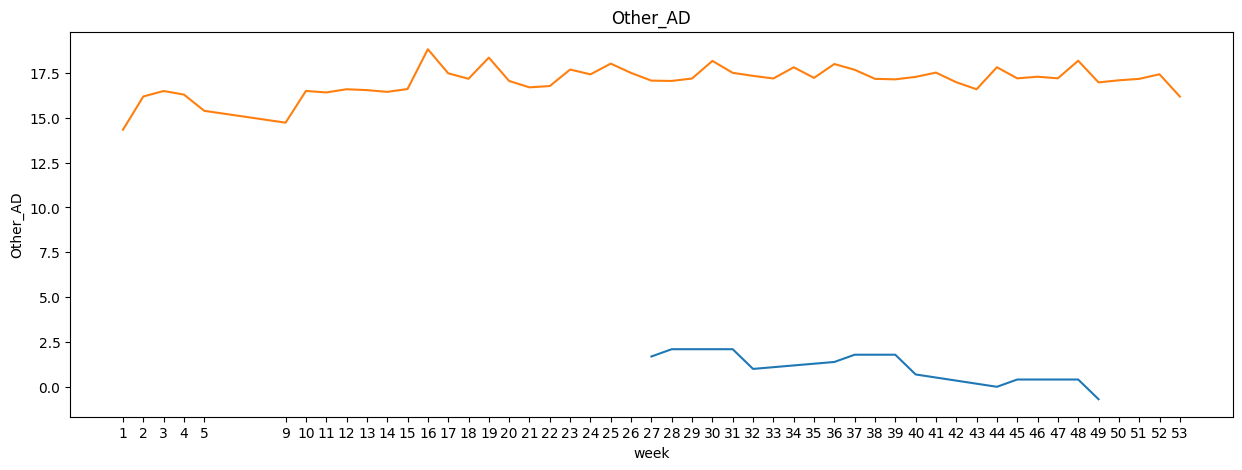

In [258]:
camera.columns
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk[i]))
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk['gmv']))
    plt.xticks(camera_wk['week'])
    x=x+1
    plt.show()



# tv , online marketing , affliates , radio and other doesnt seems impacting the sales much

KeyError: ignored

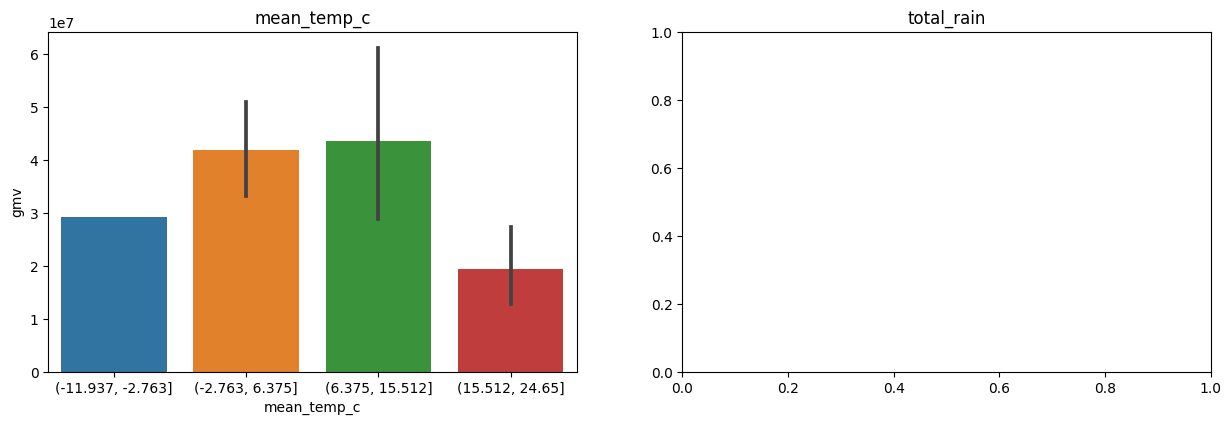

In [295]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=4))
  x=x+1

## total rain , stock index looks no pattern

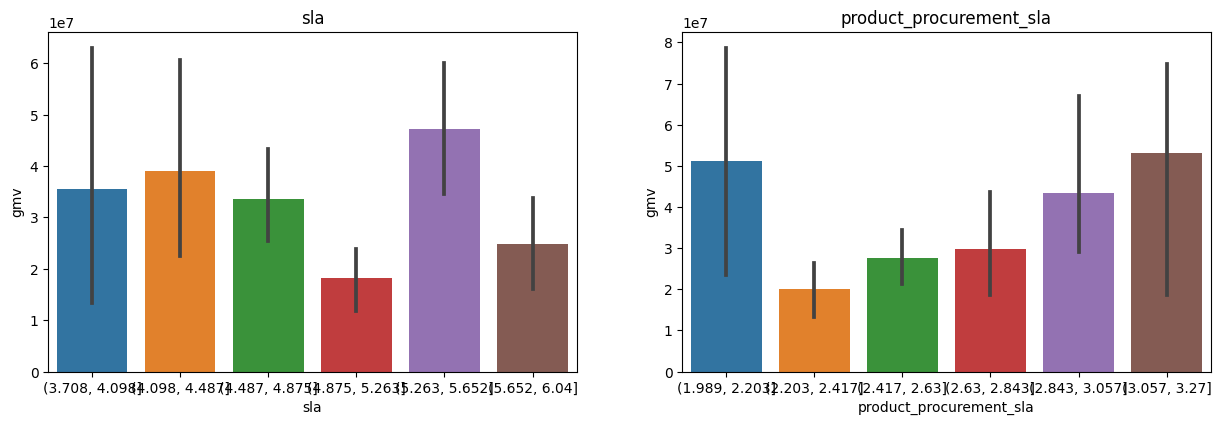

In [338]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=6))
  x=x+1

# product procurement sla has a pattern , less days probably are cheap products and getting sold out at high number and then high priced product
# taking high procurement time and high gmv
# but doesnt look like a reason of impact

In [269]:
camera_wk['sales_per']=(camera_wk['num_of_sales']-1)/7
camera_wk.drop('num_of_sales',1,inplace=True)

<Axes: >

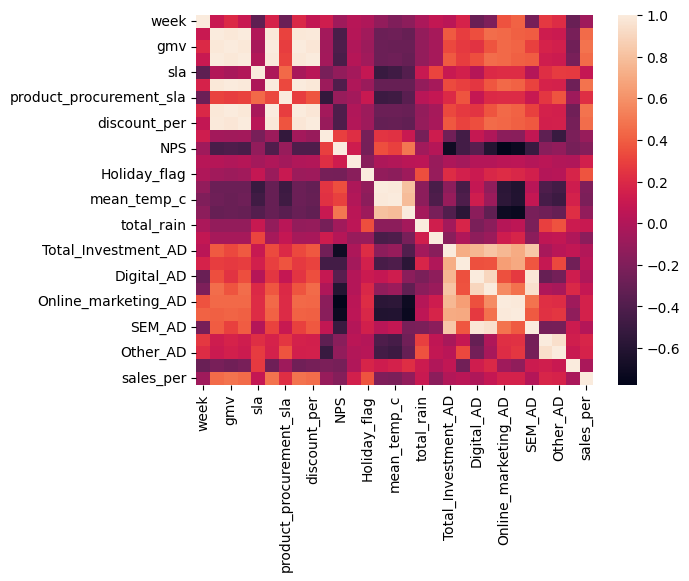

In [270]:
# camera_wk.corr()[camera_wk.corr()>0.5]

sns.heatmap(camera_wk.corr())


In [ ]:
## removing nps as its high correlated to ads


Camera Modeling


In [271]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [272]:
camera_wk.isnull().sum()
# camera_wk.drop(['NPS'],1,inplace=True)

week                       0
order_count                0
gmv                        0
units                      0
sla                        0
product_mrp                0
product_procurement_sla    0
listing_price              0
discount_per               0
Stock_Index                0
NPS                        0
pay_day_in_wk              0
Holiday_flag               0
max_temp_c                 0
mean_temp_c                0
cool_deg_c                 0
total_rain                 0
total_snow                 0
Total_Investment_AD        0
TV_AD                      0
Digital_AD                 0
Content_Marketing_AD       0
Online_marketing_AD        0
Affiliates_AD              0
SEM_AD                     0
Radio_AD                   0
Other_AD                   0
cod_per                    0
sales_per                  0
dtype: int64

In [282]:
camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)

In [273]:
## dropping other variables who doesnt look like havong an impact from analysis done above
# total rain, nps,tv , online marketing , affliates , radio and other ads doesnt seems impacting the sales much
camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS'],1,inplace=True)

In [398]:
camera_wk.drop('Holiday_flag',1,inplace=True)
camera_wk.drop(['sla','product_procurement_sla'],1,inplace=True)
camera_wk.drop('cool_deg_c',1,inplace=True)

In [399]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [400]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera_wk.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train

In [401]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [289]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [402]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)

In [403]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'listing_price', 'discount_per', 'Stock_Index', 'pay_day_in_wk',
       'max_temp_c', 'mean_temp_c', 'total_snow', 'Total_Investment_AD',
       'TV_AD', 'Digital_AD', 'Content_Marketing_AD', 'SEM_AD', 'cod_per',
       'sales_per'],
      dtype='object')

In [346]:
list(features)

['week',
 'listing_price',
 'discount_per',
 'Stock_Index',
 'pay_day_in_wk',
 'max_temp_c',
 'mean_temp_c',
 'cool_deg_c',
 'Total_Investment_AD',
 'TV_AD',
 'Digital_AD',
 'Content_Marketing_AD',
 'SEM_AD',
 'cod_per',
 'sales_per']

In [405]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.403e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           9.59e-37
Time:                        17:02:17   Log-Likelihood:                 167.21
No. Observations:                  35   AIC:                            -304.4
Df Residuals:                      20   BIC:                            -281.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0042 

Features     VIF
1          listing_price  833.59
2           discount_per  775.80
8    Total_Investment_AD  429.93
9                  TV_AD  234.29
5             max_temp_c  126.44
6            mean_temp_c   80.39
0                   week   62.72
12                SEM_AD   61.63
13               cod_per   49.69
10            Digital_AD   34.89
11  Content_Marketing_AD   30.25
7             total_snow   13.89
14             sales_per   11.27
3            Stock_Index   10.58
4          pay_day_in_wk     NaN

In [406]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.83e-18
Time:                        17:02:22   Log-Likelihood:                 88.874
No. Observations:                  35   AIC:                            -149.7
Df Residuals:                      21   BIC:                            -128.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0218 

Features     VIF
7    Total_Investment_AD  424.82
8                  TV_AD  215.10
4             max_temp_c  126.15
5            mean_temp_c   75.34
11                SEM_AD   61.57
0                   week   54.72
12               cod_per   45.30
9             Digital_AD   34.86
10  Content_Marketing_AD   24.73
1           discount_per   22.04
6             total_snow   13.83
13             sales_per   11.24
2            Stock_Index   10.55
3          pay_day_in_wk     NaN

In [407]:
# checkVIF(X_train[features])

features=features.drop('Total_Investment_AD')
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     199.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.50e-19
Time:                        17:02:29   Log-Likelihood:                 88.575
No. Observations:                  35   AIC:                            -151.2
Df Residuals:                      22   BIC:                            -130.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0180 

Features     VIF
4             max_temp_c  126.09
5            mean_temp_c   69.61
11               cod_per   43.12
0                   week   36.28
7                  TV_AD   33.69
9   Content_Marketing_AD   21.94
1           discount_per   20.46
8             Digital_AD   15.13
10                SEM_AD   14.83
6             total_snow   13.64
12             sales_per   11.06
2            Stock_Index    7.19
3          pay_day_in_wk     NaN

In [408]:
features=features.drop('max_temp_c',1)
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     227.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           9.66e-21
Time:                        17:02:36   Log-Likelihood:                 88.566
No. Observations:                  35   AIC:                            -153.1
Df Residuals:                      23   BIC:                            -134.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0162 

Features    VIF
10               cod_per  42.75
0                   week  35.21
6                  TV_AD  33.64
8   Content_Marketing_AD  19.08
1           discount_per  18.71
7             Digital_AD  14.93
9                 SEM_AD  13.45
5             total_snow  12.15
11             sales_per  10.96
4            mean_temp_c   8.07
2            Stock_Index   6.87
3          pay_day_in_wk    NaN

In [409]:
features=features.drop('cod_per')
X_train_m==build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     232.3
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.29e-21
Time:                        17:02:43   Log-Likelihood:                 86.549
No. Observations:                  35   AIC:                            -151.1
Df Residuals:                      24   BIC:                            -134.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0217 

Features    VIF
0                   week  33.06
6                  TV_AD  32.51
1           discount_per  18.70
7             Digital_AD  13.83
5             total_snow  11.96
10             sales_per  10.83
9                 SEM_AD  10.54
8   Content_Marketing_AD   8.16
4            mean_temp_c   7.68
2            Stock_Index   6.87
3          pay_day_in_wk    NaN

In [410]:
features=features.drop('pay_day_in_wk')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     232.3
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.29e-21
Time:                        17:02:53   Log-Likelihood:                 86.549
No. Observations:                  35   AIC:                            -151.1
Df Residuals:                      24   BIC:                            -134.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0217 

Features    VIF
0                  week  33.06
5                 TV_AD  32.51
1          discount_per  18.70
6            Digital_AD  13.83
4            total_snow  11.96
9             sales_per  10.83
8                SEM_AD  10.54
7  Content_Marketing_AD   8.16
3           mean_temp_c   7.68
2           Stock_Index   6.87

In [411]:
features=features.drop('week')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     199.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.34e-21
Time:                        17:03:02   Log-Likelihood:                 81.378
No. Observations:                  35   AIC:                            -142.8
Df Residuals:                      25   BIC:                            -127.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0980 

Features    VIF
4                 TV_AD  18.15
0          discount_per  13.92
5            Digital_AD  13.83
3            total_snow  11.62
8             sales_per   9.44
7                SEM_AD   8.90
6  Content_Marketing_AD   7.82
2           mean_temp_c   7.68
1           Stock_Index   5.81

In [412]:
features=features.drop('TV_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     223.7
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.74e-22
Time:                        17:03:09   Log-Likelihood:                 80.654
No. Observations:                  35   AIC:                            -143.3
Df Residuals:                      26   BIC:                            -129.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0231 

Features    VIF
4            Digital_AD  13.72
3            total_snow  11.23
6                SEM_AD   8.83
7             sales_per   8.00
2           mean_temp_c   7.68
5  Content_Marketing_AD   7.45
1           Stock_Index   5.68
0          discount_per   5.47

In [413]:
features=features.drop('Digital_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     261.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.08e-23
Time:                        17:03:16   Log-Likelihood:                 80.402
No. Observations:                  35   AIC:                            -144.8
Df Residuals:                      27   BIC:                            -132.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0125 

Features    VIF
3            total_snow  11.17
6             sales_per   7.99
4  Content_Marketing_AD   7.11
2           mean_temp_c   6.65
1           Stock_Index   5.68
0          discount_per   5.46
5                SEM_AD   3.76

In [414]:
features=features.drop('total_snow')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     315.7
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.26e-24
Time:                        17:03:22   Log-Likelihood:                 80.356
No. Observations:                  35   AIC:                            -146.7
Df Residuals:                      28   BIC:                            -135.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0112 

Features   VIF
3  Content_Marketing_AD  6.40
2           mean_temp_c  6.28
0          discount_per  4.76
1           Stock_Index  4.76
5             sales_per  4.26
4                SEM_AD  3.35

In [415]:
features=features.drop('Stock_Index')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     389.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.19e-25
Time:                        17:03:31   Log-Likelihood:                 80.236
No. Observations:                  35   AIC:                            -148.5
Df Residuals:                      29   BIC:                            -139.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0169 

Features   VIF
2  Content_Marketing_AD  6.39
4             sales_per  4.24
0          discount_per  4.15
1           mean_temp_c  4.08
3                SEM_AD  3.31

In [416]:
features=features.drop('sales_per')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     499.3
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.65e-27
Time:                        17:03:44   Log-Likelihood:                 80.079
No. Observations:                  35   AIC:                            -150.2
Df Residuals:                      30   BIC:                            -142.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0296 

Features   VIF
2  Content_Marketing_AD  6.08
0          discount_per  4.05
3                SEM_AD  3.31
1           mean_temp_c  2.95

In [417]:
features=features.drop('Content_Marketing_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     555.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.10e-27
Time:                        17:03:52   Log-Likelihood:                 76.401
No. Observations:                  35   AIC:                            -144.8
Df Residuals:                      31   BIC:                            -138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0161      0.021     -0.779   

Features   VIF
0  discount_per  2.99
2        SEM_AD  2.78
1   mean_temp_c  2.44

In [418]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4497.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    4.45e-42
Time:                        17:04:02   Log-Likelihood:                          76.063
No. Observations:                  35   AIC:                                     -146.1
Df Residuals:                      32   BIC:                                     -141.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

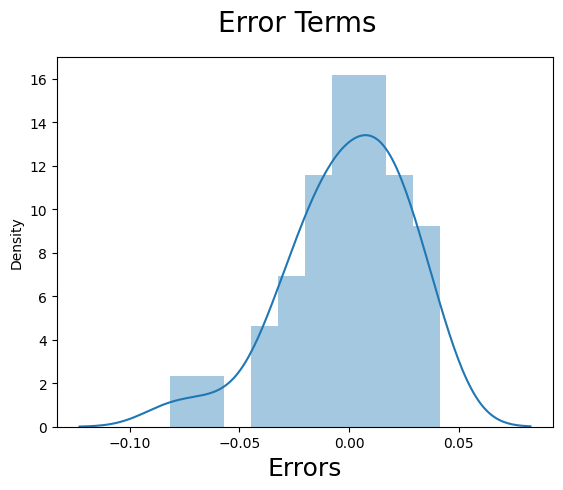

In [419]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

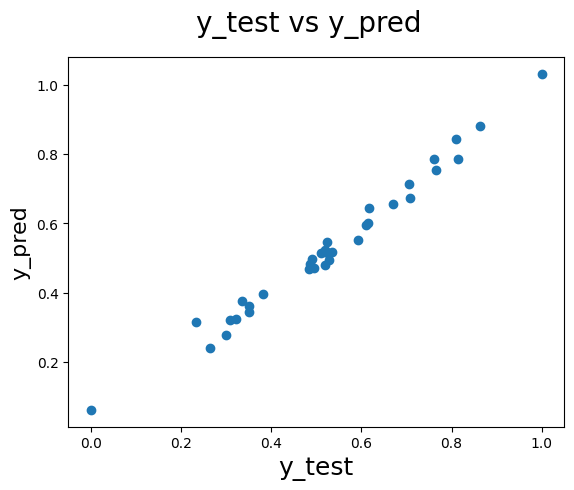

In [420]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [421]:
## on test
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [422]:
y_test_pred=lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

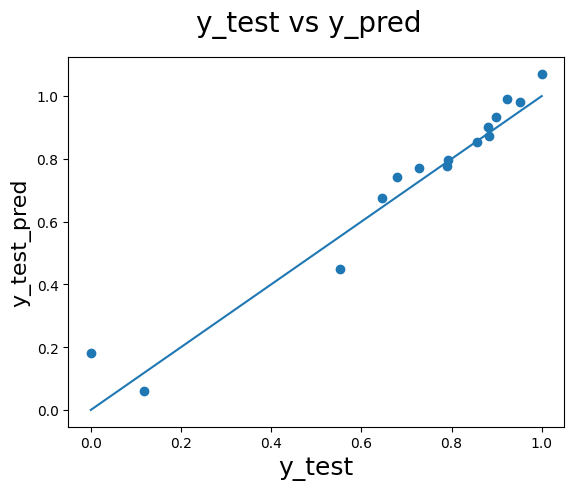

In [423]:
# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

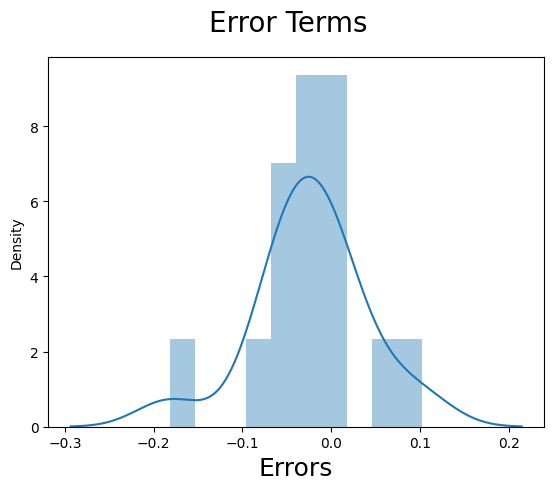

In [424]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


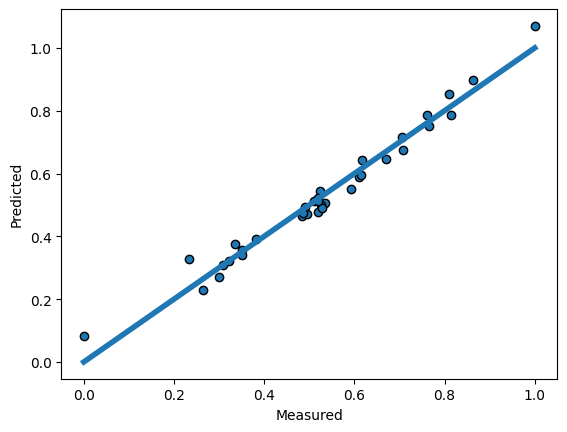

In [425]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Multiplicative

In [469]:

camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          'sale_date':"nunique"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')


camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# camera_wk.sale_date.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)
camera_wk['sales_per']=((camera_wk['num_of_sales']-1)/7)*100
camera_wk.drop('num_of_sales',1,inplace=True)

In [470]:

camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)
camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS'],1,inplace=True)
camera_wk.drop(['sla','product_procurement_sla'],1,inplace=True)
camera_wk.drop('cool_deg_c',1,inplace=True)

In [471]:
camera_wk[camera_wk.columns]=nm.log(camera_wk[camera_wk.columns])
# camera_wk.columns

In [472]:
camera_wk.describe()

camera_wk=camera_wk.replace([nm.inf, -nm.inf], 0)
camera_wk=camera_wk.fillna(0)

camera_wk.columns

Index(['week', 'gmv', 'listing_price', 'discount_per', 'Stock_Index',
       'pay_day_in_wk', 'max_temp_c', 'mean_temp_c', 'total_snow',
       'Total_Investment_AD', 'TV_AD', 'Digital_AD', 'Content_Marketing_AD',
       'SEM_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [473]:
df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [474]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)
selector.fit(X_train, y_train)
# X_train.columns
#
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'listing_price', 'discount_per', 'Stock_Index', 'max_temp_c',
       'mean_temp_c', 'total_snow', 'Total_Investment_AD', 'TV_AD', 'SEM_AD',
       'cod_per', 'sales_per'],
      dtype='object')

In [475]:
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.697e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.02e-40
Time:                        17:11:16   Log-Likelihood:                 166.18
No. Observations:                  35   AIC:                            -306.4
Df Residuals:                      22   BIC:                            -286.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0032    

Features     VIF
1         listing_price  673.84
2          discount_per  627.82
7   Total_Investment_AD  171.57
4            max_temp_c  114.84
8                 TV_AD  109.24
5           mean_temp_c   73.29
0                  week   49.45
10              cod_per   19.60
9                SEM_AD   13.30
6            total_snow   11.54
3           Stock_Index    7.95
11            sales_per    2.88

In [476]:
features=features.drop('listing_price',1)
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.12e-20
Time:                        17:11:26   Log-Likelihood:                 86.775
No. Observations:                  35   AIC:                            -149.6
Df Residuals:                      23   BIC:                            -130.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0774    

Features     VIF
6   Total_Investment_AD  171.21
3            max_temp_c  109.33
7                 TV_AD  102.44
4           mean_temp_c   61.07
0                  week   35.96
1          discount_per   23.12
9               cod_per   19.57
8                SEM_AD   12.80
5            total_snow   11.50
2           Stock_Index    7.83
10            sales_per    2.88

In [477]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     235.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.99e-21
Time:                        17:11:40   Log-Likelihood:                 86.756
No. Observations:                  35   AIC:                            -151.5
Df Residuals:                      24   BIC:                            -134.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0780      0.044     -1.757   

Features     VIF
3    max_temp_c  109.33
4   mean_temp_c   60.49
6         TV_AD   33.42
0          week   31.03
1  discount_per   23.08
8       cod_per   18.31
5    total_snow   11.30
2   Stock_Index    6.69
7        SEM_AD    5.61
9     sales_per    2.82

In [478]:
features=features.drop('max_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     271.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.18e-22
Time:                        17:11:48   Log-Likelihood:                 86.727
No. Observations:                  35   AIC:                            -153.5
Df Residuals:                      25   BIC:                            -137.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0817      0.040     -2.065   

Features    VIF
5         TV_AD  33.42
0          week  30.98
1  discount_per  20.31
7       cod_per  16.25
4    total_snow   9.65
2   Stock_Index   6.39
3   mean_temp_c   6.32
6        SEM_AD   5.45
8     sales_per   2.79

In [479]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     302.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.19e-23
Time:                        17:11:55   Log-Likelihood:                 85.890
No. Observations:                  35   AIC:                            -153.8
Df Residuals:                      26   BIC:                            -139.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0993      0.036     -2.730   

Features    VIF
1  discount_per  20.30
6       cod_per  16.07
0          week  14.65
4    total_snow   8.86
3   mean_temp_c   6.32
2   Stock_Index   5.36
5        SEM_AD   3.63
7     sales_per   2.74

In [480]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     333.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.64e-24
Time:                        17:12:07   Log-Likelihood:                 84.578
No. Observations:                  35   AIC:                            -153.2
Df Residuals:                      27   BIC:                            -140.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0615      0.025     -2.429   

Features    VIF
1  discount_per  19.95
0          week  13.85
4    total_snow   6.36
2   Stock_Index   5.23
3   mean_temp_c   5.09
5        SEM_AD   3.59
6     sales_per   2.67

In [481]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     268.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.15e-23
Time:                        17:12:12   Log-Likelihood:                 77.536
No. Observations:                  35   AIC:                            -141.1
Df Residuals:                      28   BIC:                            -130.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0221      0.028     -0.803   

Features   VIF
0  discount_per  8.65
3    total_snow  6.02
1   Stock_Index  5.18
2   mean_temp_c  4.82
4        SEM_AD  3.02
5     sales_per  2.42

In [482]:
features=features.drop('total_snow',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     332.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.12e-24
Time:                        17:12:24   Log-Likelihood:                 77.525
No. Observations:                  35   AIC:                            -143.1
Df Residuals:                      29   BIC:                            -133.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0243      0.022     -1.128   

Features   VIF
0  discount_per  5.31
1   Stock_Index  4.75
2   mean_temp_c  4.51
3        SEM_AD  2.92
4     sales_per  2.06

In [483]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     424.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           6.17e-26
Time:                        17:12:33   Log-Likelihood:                 77.288
No. Observations:                  35   AIC:                            -144.6
Df Residuals:                      30   BIC:                            -136.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0219      0.021     -1.045   

Features   VIF
0  discount_per  4.76
2        SEM_AD  2.89
1   mean_temp_c  2.45
3     sales_per  2.05

In [484]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     555.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.10e-27
Time:                        17:12:41   Log-Likelihood:                 76.401
No. Observations:                  35   AIC:                            -144.8
Df Residuals:                      31   BIC:                            -138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0161      0.021     -0.779   

Features   VIF
0  discount_per  2.99
2        SEM_AD  2.78
1   mean_temp_c  2.44

In [485]:
lm_m = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm_m.summary()) # model summary
y_train_pred=lm_m.predict(X_train[features])
features


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4497.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    4.45e-42
Time:                        17:12:52   Log-Likelihood:                          76.063
No. Observations:                  35   AIC:                                     -146.1
Df Residuals:                      32   BIC:                                     -141.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Index(['discount_per', 'mean_temp_c', 'SEM_AD'], dtype='object')

Mean_Squared_Error : 0.0007583944323272083
r_square_value : 0.9813816611451841


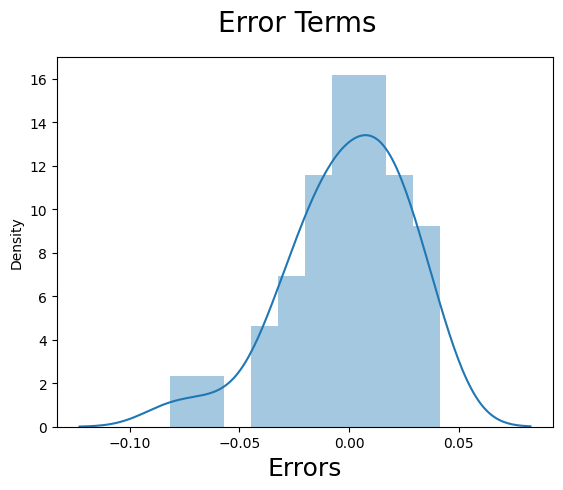

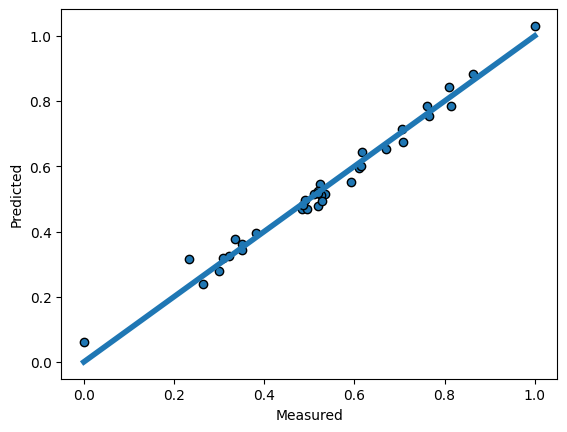

In [486]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [487]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



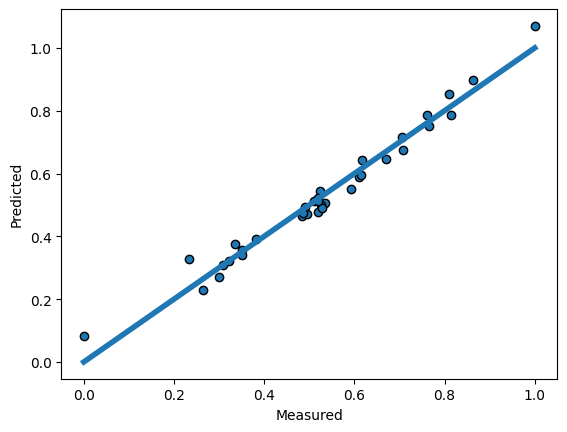

In [488]:

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [489]:
df_test[df_test.columns]=scaler.fit_transform(df_test[df_test.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']


In [490]:
y_test_pred= lm_m.predict(X_test[features])

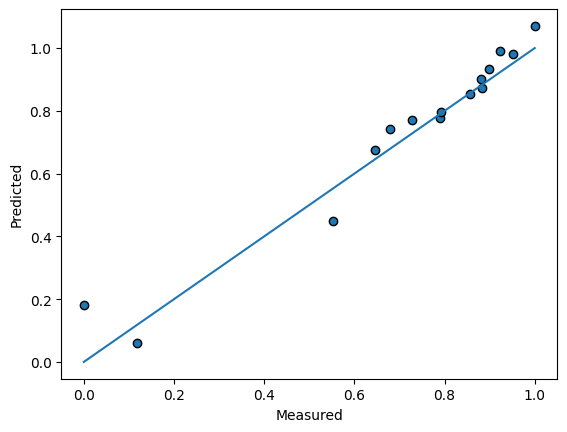

In [491]:
# y_test.min()
# y_test.max()
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

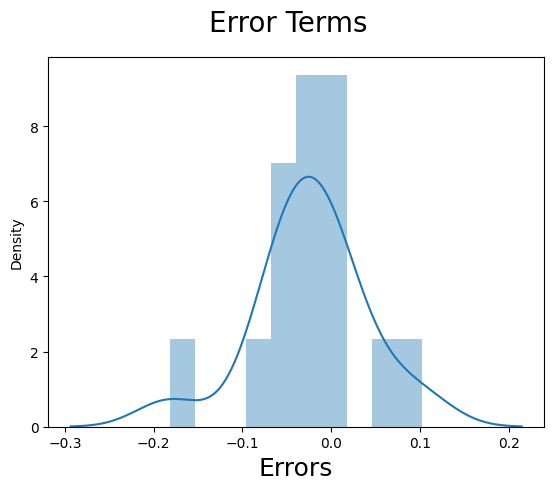

In [492]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [493]:
features

Index(['discount_per', 'mean_temp_c', 'SEM_AD'], dtype='object')

# Home Audio

In [495]:
##
ha=EleData3[EleData3.product_analytic_sub_category=='homeaudio']
# camera.discount_per
# EleData3.product_analytic_sub_category.value_counts()

In [140]:
ha.isnull().sum()
## analysis and all pending

order_date                           0
Month                                0
order_item_id                        0
gmv                                  0
units                                0
order_payment_type                   0
sla                                  0
product_analytic_category            0
product_analytic_sub_category        0
product_mrp                          0
product_procurement_sla              0
product_analytic_vertical_derived    0
week                                 0
listing_price                        0
discount_per                         0
sale_date                            0
Stock_Index                          0
NPS                                  0
Year                                 0
pay_date_flag                        0
Holiday_flag                         0
dtype: int64

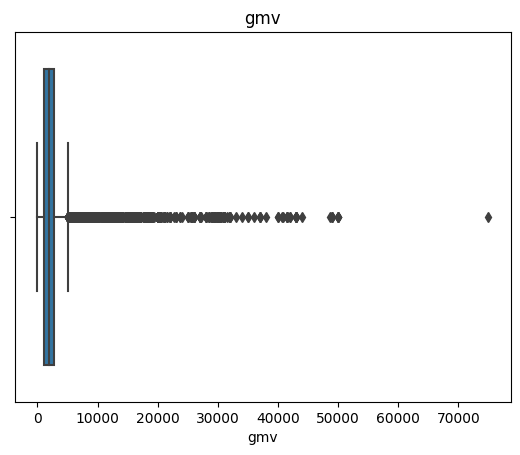

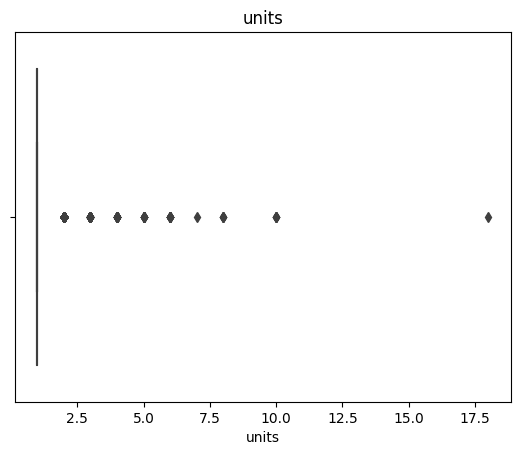

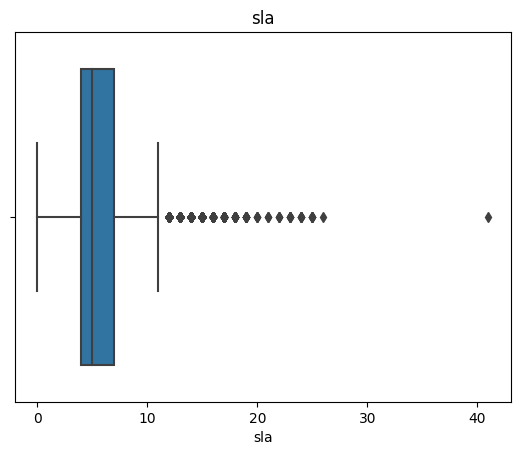

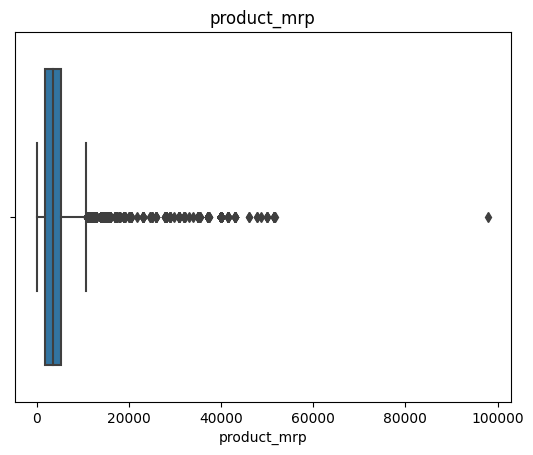

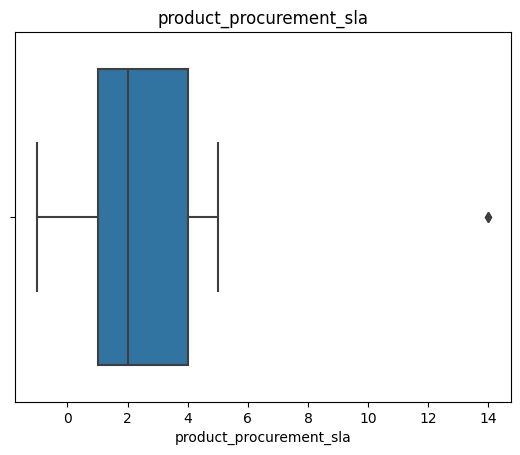

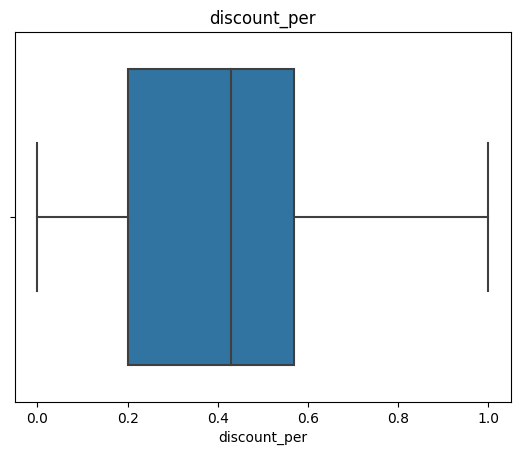

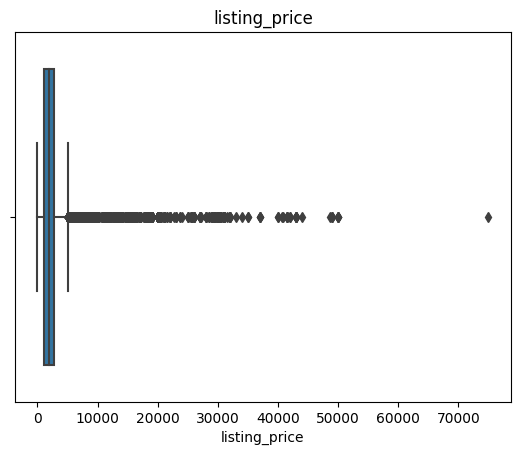

In [496]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()


In [497]:


q1=ha['product_mrp'].quantile(0.25)
q3=ha['product_mrp'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# ha[ha['product_mrp']>112000]
ha.loc[ha['product_mrp']>up,'product_mrp']=up
ha.loc[ha['product_mrp']<lw,'product_mrp']=lw


q1=ha['gmv'].quantile(0.25)
q3=ha['gmv'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['gmv']>up,'gmv']=up
ha.loc[ha['gmv']<lw,'gmv']=lw


q1=ha['listing_price'].quantile(0.25)
q3=ha['listing_price'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['listing_price']>up,'listing_price']=up
ha.loc[ha['listing_price']<lw,'listing_price']=lw


q1=ha['discount_per'].quantile(0.25)
q3=ha['discount_per'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# ha[ha['discount_per']>1.39]
q1=ha['sla'].quantile(0.25)
q3=ha['sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['sla']>up,'sla']=up
ha.loc[ha['sla']<lw,'sla']=lw
q1=ha['product_procurement_sla'].quantile(0.25)
q3=ha['product_procurement_sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['product_procurement_sla']>up,'product_procurement_sla']=up
ha.loc[ha['product_procurement_sla']<lw,'product_procurement_sla']=lw

-8966.0   16100.0
-4594.5   8387.5
-4555.5   8312.5
-0.9550000000000001   1.725
-12.5   23.5
-6.5   11.5


In [498]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [499]:
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

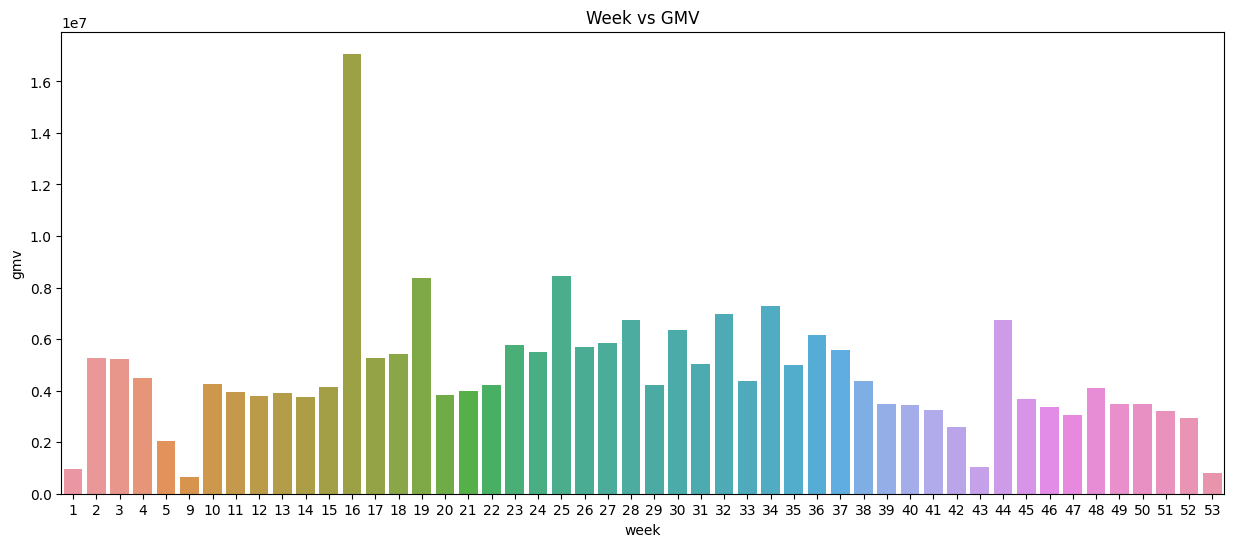

In [502]:
plt.figure(figsize=(15,6))
sns.barplot(x=ha_wk['week'],y=ha_wk['gmv'])
plt.title("Week vs GMV")
plt.show()

### 16 , 19 , 25, 30 ,32,34  ,44 week

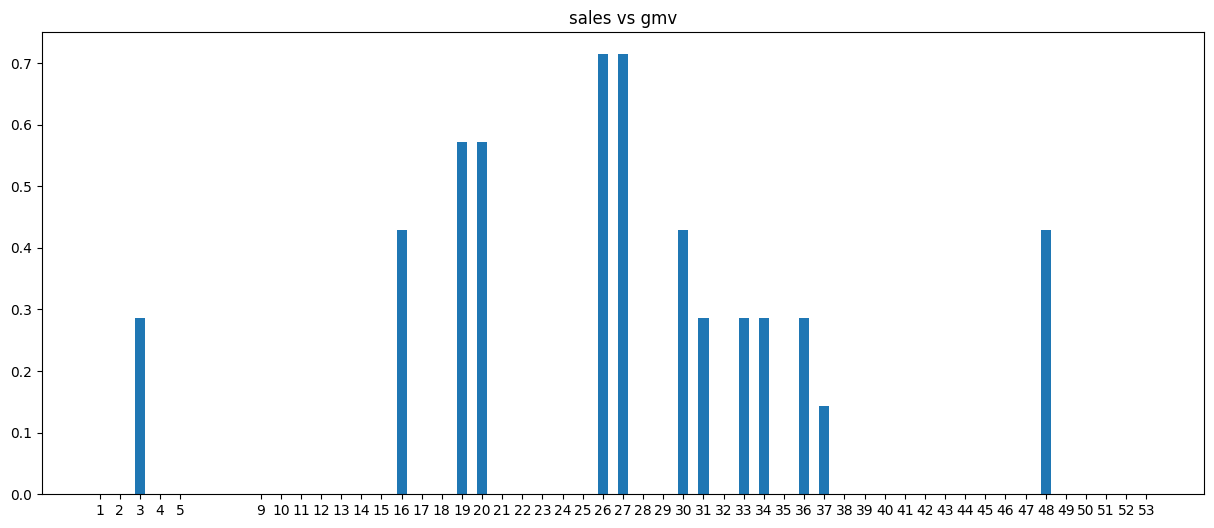

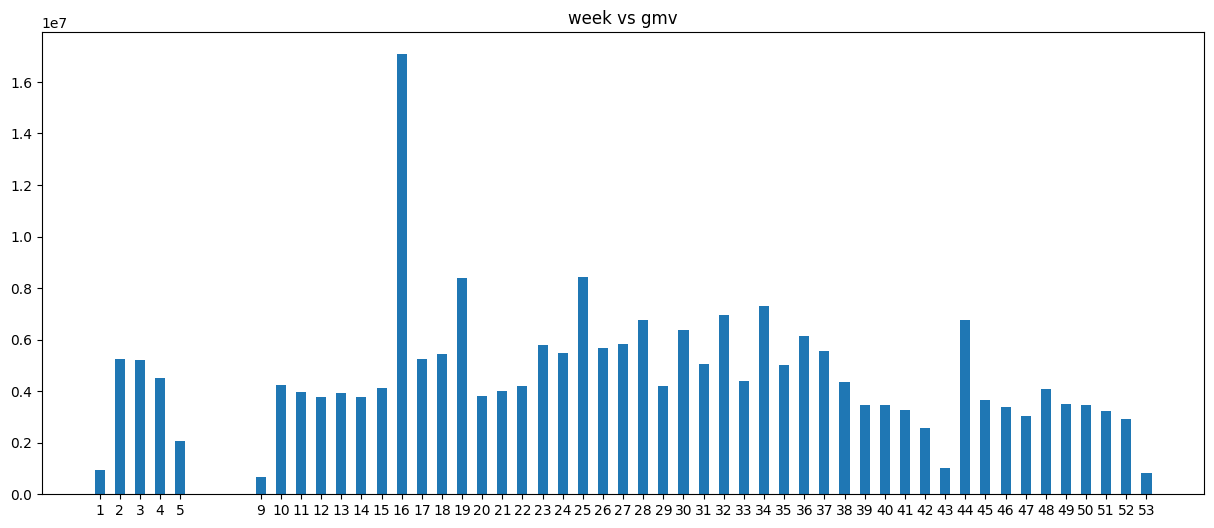

In [506]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=ha_wk['week'],height=ha_wk['sales_per'],width=width)
plt.xticks(ha_wk['week'])
plt.title('sales vs gmv')
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['gmv'],width=width)
plt.xticks(ha_wk['week'])
plt.title('week vs gmv')
plt.show()


## sales 16 , 19, 20, 26,27,30,31, 33,34,48
## doesnt have much impact specially week 20 ,33,34 etc

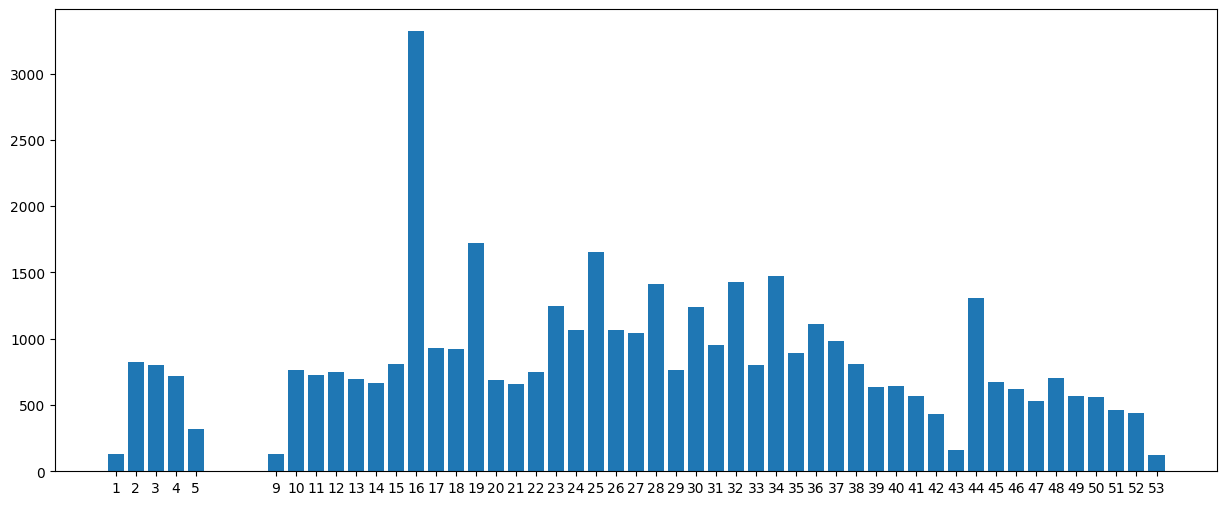

In [508]:
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['discount_per'])
plt.xticks(ha_wk['week'])
plt.show()

# 16,19,23,25,28,30,32,34,44
## impacting gmv

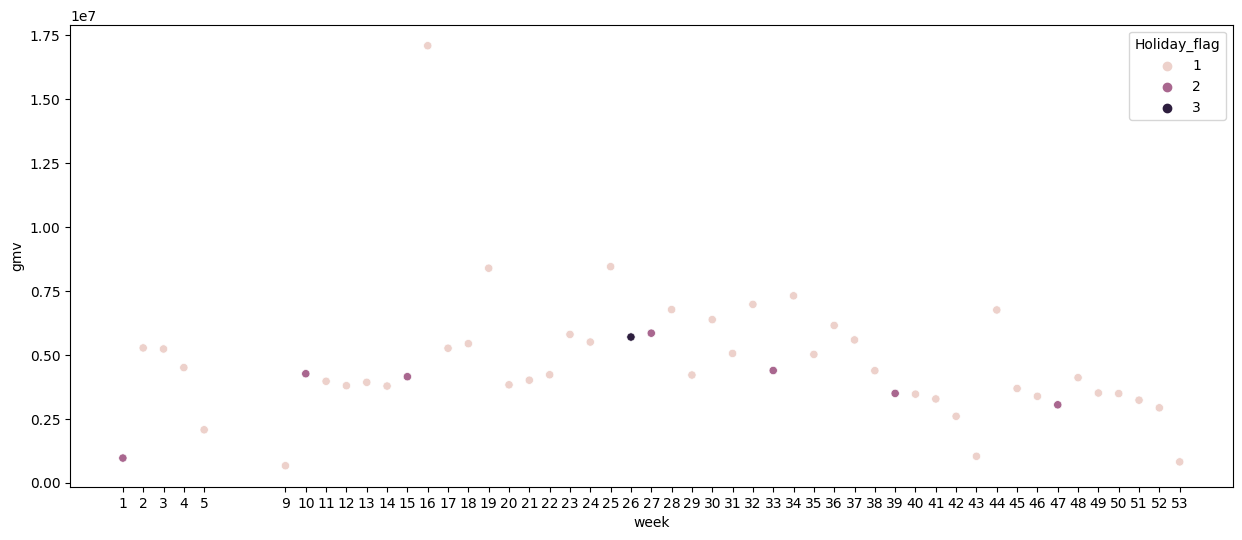

In [510]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=ha_wk['week'],y=ha_wk['gmv'],hue=ha_wk['Holiday_flag'])
plt.xticks(ha_wk['week'])
plt.show()


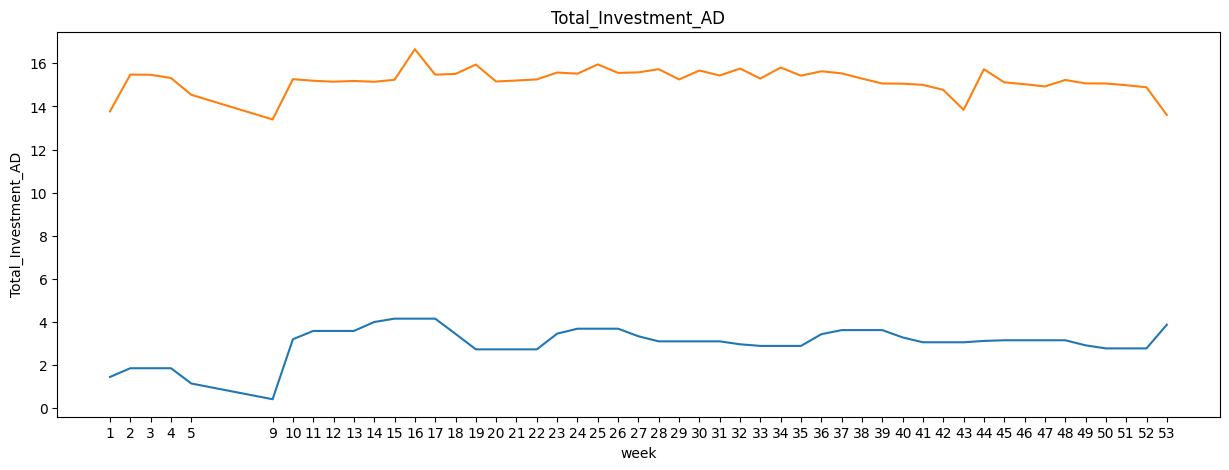

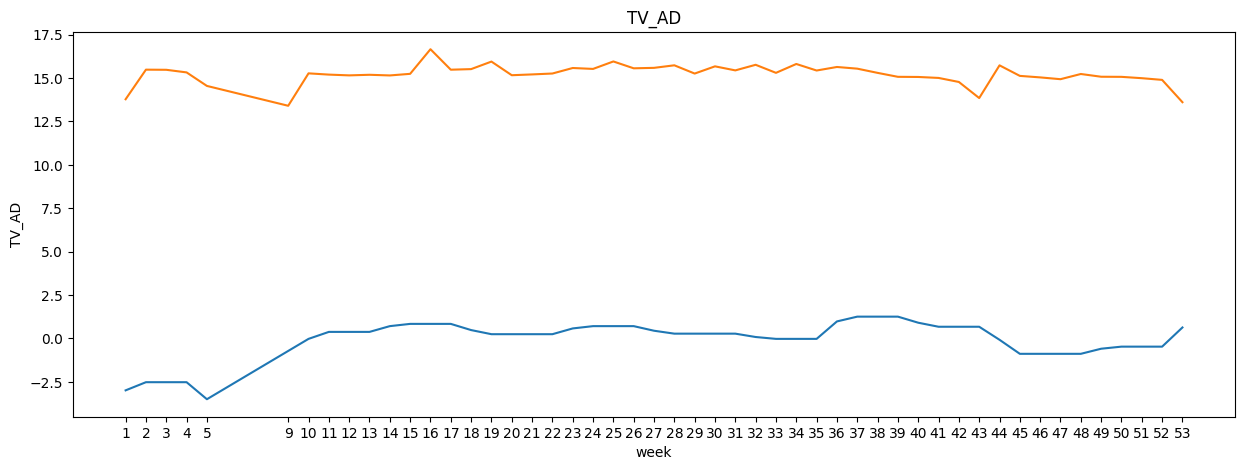

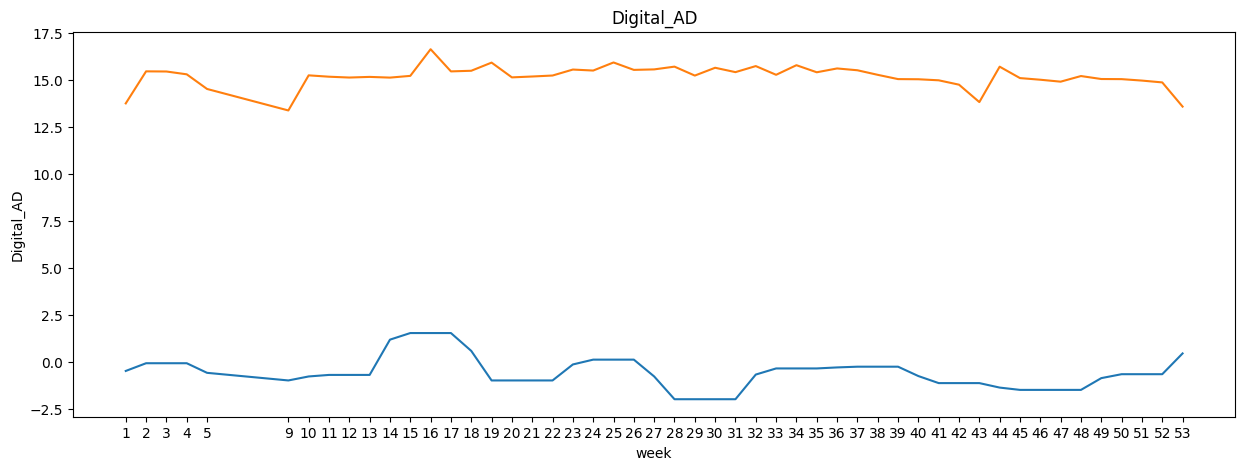

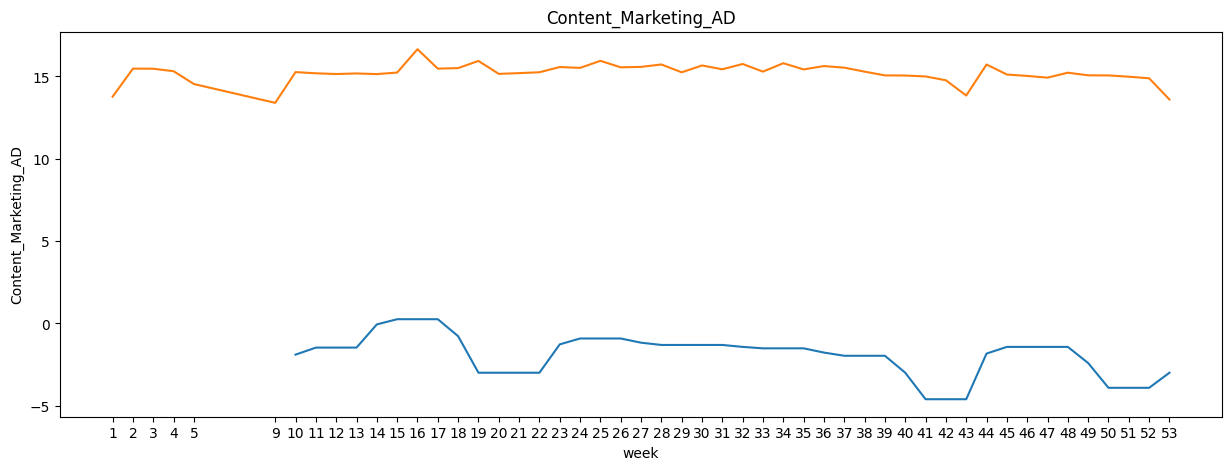

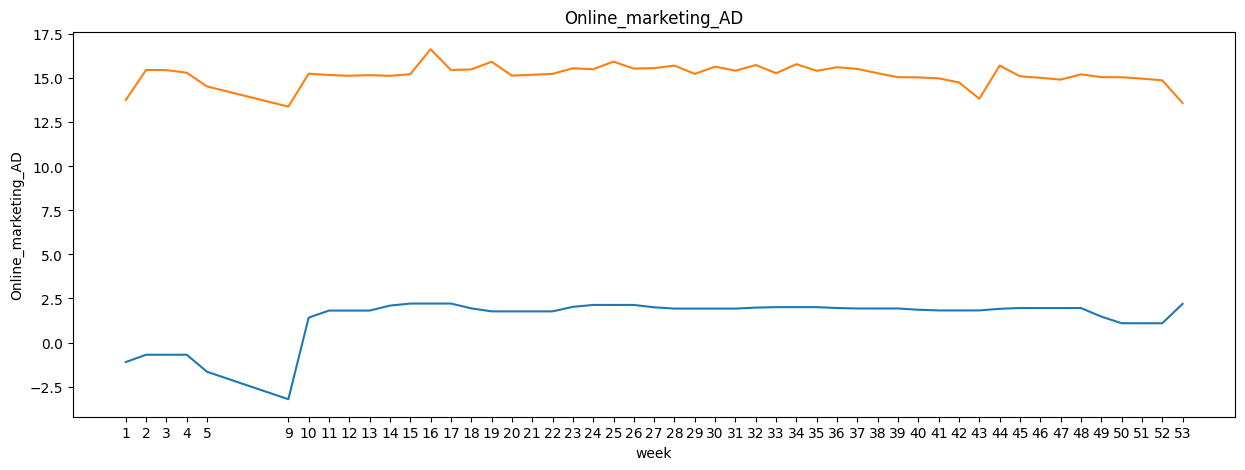

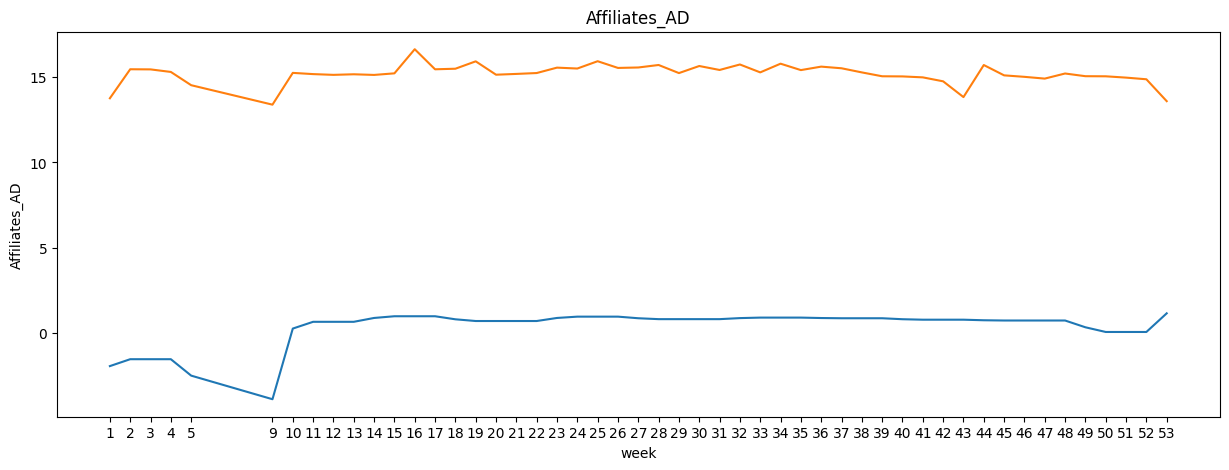

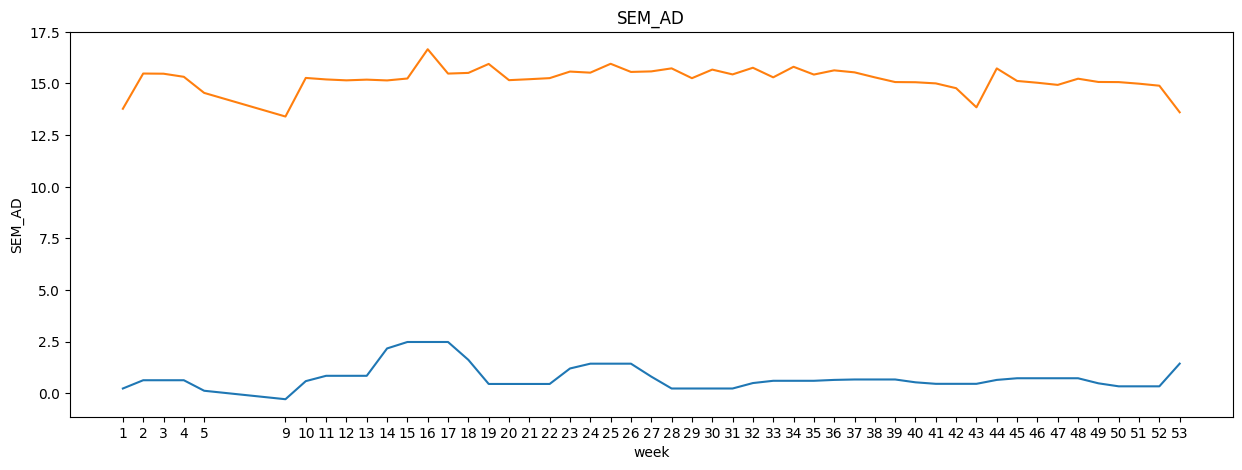

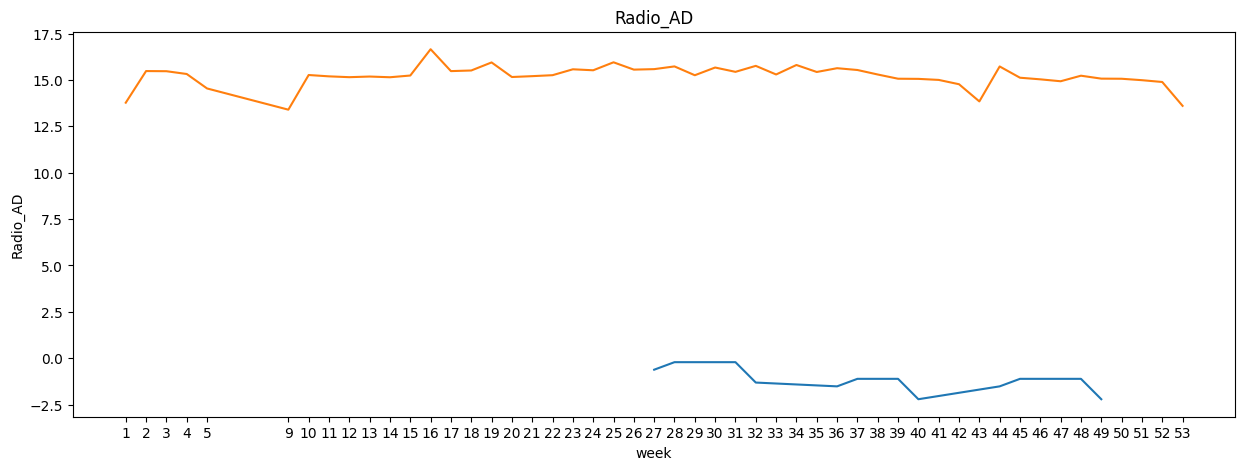

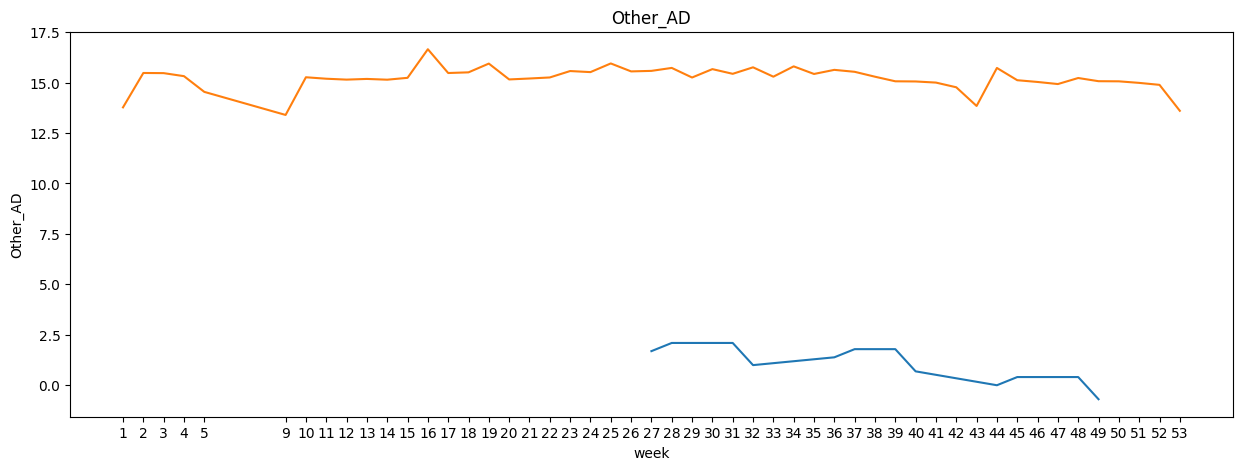

In [511]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk[i]))
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk['gmv']))
    plt.xticks(ha_wk['week'])
    x=x+1
    plt.show()

## radio , other , conent , digital and total : not required



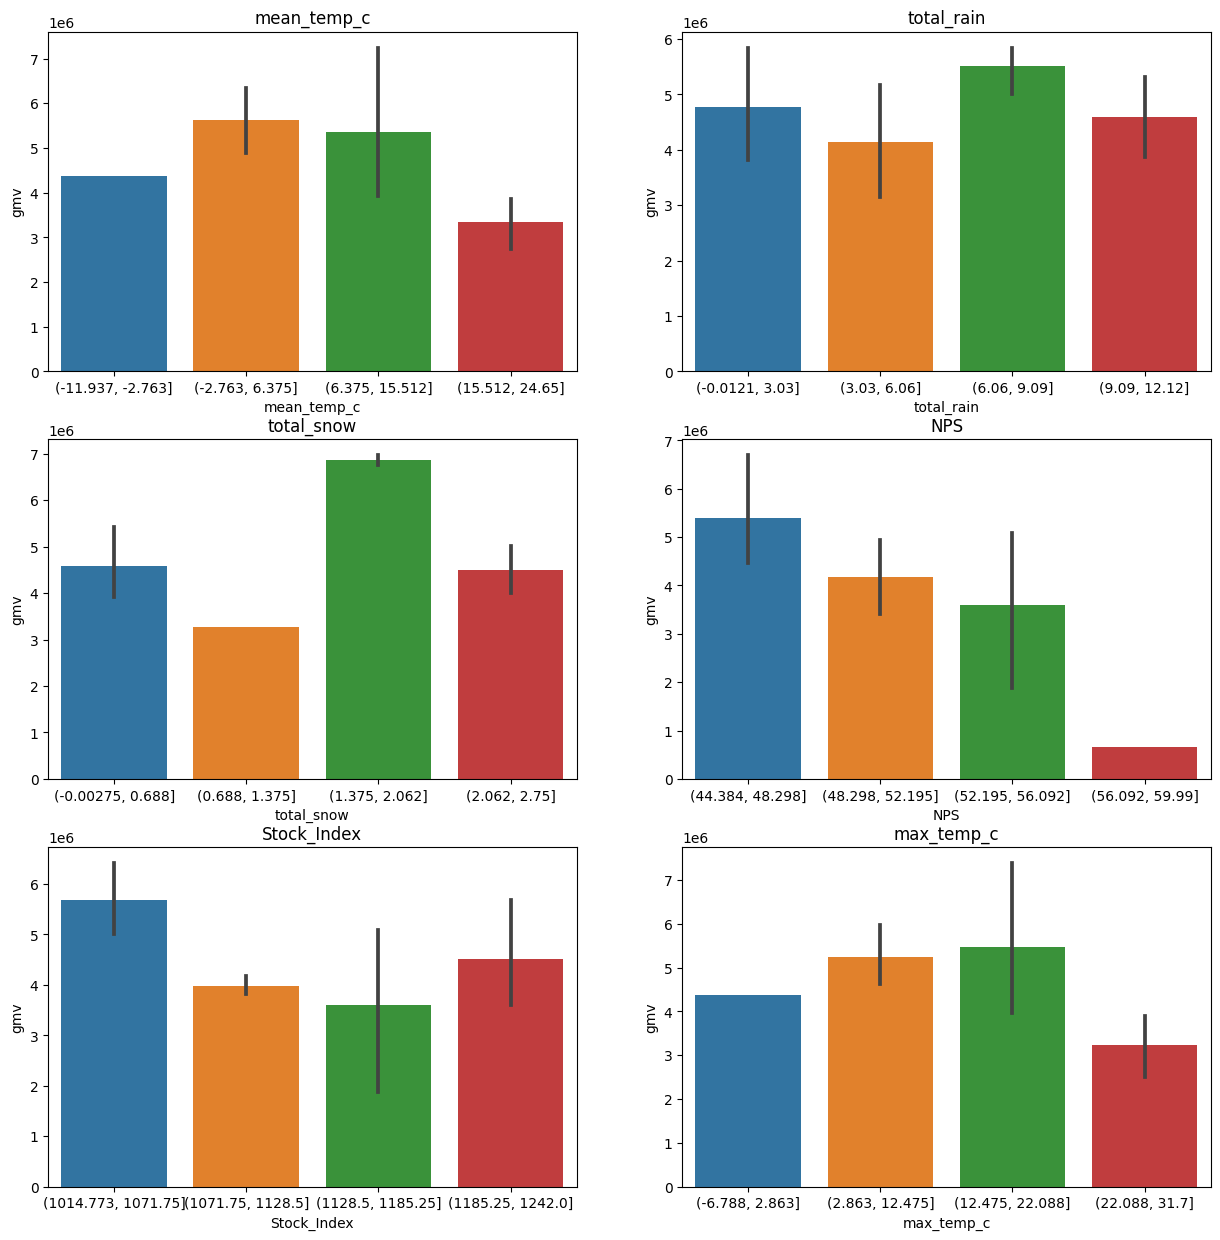

In [513]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1


# max and mean almost same impact : so max temp can be remobed

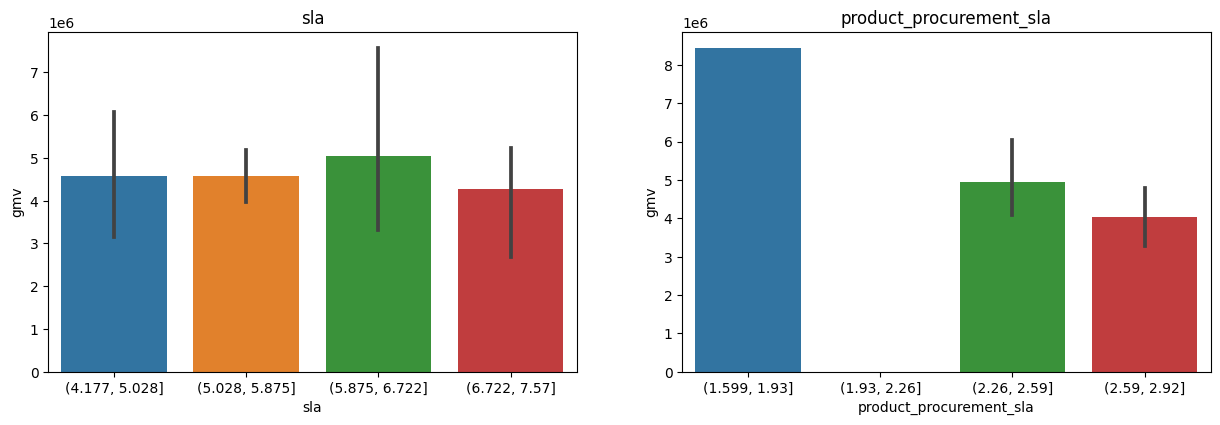

In [516]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1

## product procurement sla has a impact

In [522]:
ha_wk.drop(['sla','max_temp_c',"Radio_AD","Digital_AD","Content_Marketing_AD",
            "Total_Investment_AD","Holiday_flag","units","order_count","product_mrp","sales_per"],1,inplace=True)


In [523]:
ha_wk.drop(['Other_AD'],1,inplace=True)

df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=18, step=1)
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features



Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'pay_day_in_wk', 'mean_temp_c', 'cool_deg_c',
       'total_rain', 'total_snow', 'TV_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'SEM_AD', 'cod_per'],
      dtype='object')

In [524]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.774e+05
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.90e-43
Time:                        17:31:12   Log-Likelihood:                 223.73
No. Observations:                  35   AIC:                            -413.5
Df Residuals:                      18   BIC:                            -387.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
13            Affiliates_AD  2692.32
12      Online_marketing_AD  2179.48
2             listing_price   568.58
3              discount_per   499.70
11                    TV_AD    47.77
7               mean_temp_c    43.92
15                  cod_per    32.81
1   product_procurement_sla    27.34
4               Stock_Index    23.44
14                   SEM_AD    15.26
5                       NPS    11.47
8                cool_deg_c    10.03
0                      week     9.31
6             pay_day_in_wk     3.04
9                total_rain     2.48
10               total_snow     1.88

In [525]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.934e+05
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.61e-46
Time:                        17:31:19   Log-Likelihood:                 223.16
No. Observations:                  35   AIC:                            -414.3
Df Residuals:                      19   BIC:                            -389.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
2             listing_price  558.16
3              discount_per  493.23
12      Online_marketing_AD   46.12
7               mean_temp_c   34.16
14                  cod_per   31.53
1   product_procurement_sla   25.52
11                    TV_AD   15.01
4               Stock_Index   13.66
5                       NPS   11.34
8                cool_deg_c    9.99
0                      week    9.31
13                   SEM_AD    5.74
6             pay_day_in_wk    2.97
9                total_rain    2.39
10               total_snow    1.85

In [526]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     226.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           7.27e-19
Time:                        17:31:25   Log-Likelihood:                 103.04
No. Observations:                  35   AIC:                            -176.1
Df Residuals:                      20   BIC:                            -152.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
11      Online_marketing_AD  39.71
6               mean_temp_c  31.74
13                  cod_per  27.08
1   product_procurement_sla  21.95
10                    TV_AD  14.98
3               Stock_Index  13.43
7                cool_deg_c   9.74
4                       NPS   9.61
0                      week   8.62
2              discount_per   5.28
12                   SEM_AD   4.36
5             pay_day_in_wk   2.46
8                total_rain   2.36
9                total_snow   1.63

In [527]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     220.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.04e-19
Time:                        17:31:32   Log-Likelihood:                 100.47
No. Observations:                  35   AIC:                            -172.9
Df Residuals:                      21   BIC:                            -151.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6               mean_temp_c  31.71
1   product_procurement_sla  21.34
12                  cod_per  20.83
3               Stock_Index  12.69
10                    TV_AD  12.32
7                cool_deg_c   8.88
4                       NPS   7.76
0                      week   6.07
2              discount_per   5.00
11                   SEM_AD   4.26
5             pay_day_in_wk   2.38
8                total_rain   2.35
9                total_snow   1.63

In [528]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     228.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.37e-20
Time:                        17:31:39   Log-Likelihood:                 98.889
No. Observations:                  35   AIC:                            -171.8
Df Residuals:                      22   BIC:                            -151.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1   product_procurement_sla  20.32
11                  cod_per  19.92
9                     TV_AD   9.68
3               Stock_Index   8.08
4                       NPS   7.70
0                      week   5.62
2              discount_per   5.00
10                   SEM_AD   4.26
6                cool_deg_c   3.49
7                total_rain   2.33
5             pay_day_in_wk   2.15
8                total_snow   1.40

In [529]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     231.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           7.73e-21
Time:                        17:31:46   Log-Likelihood:                 96.840
No. Observations:                  35   AIC:                            -169.7
Df Residuals:                      23   BIC:                            -151.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0325      0.036     -0.906

Features    VIF
10        cod_per  13.95
8           TV_AD   8.92
2     Stock_Index   7.72
3             NPS   6.66
0            week   5.61
1    discount_per   4.93
9          SEM_AD   4.24
5      cool_deg_c   3.49
6      total_rain   2.31
4   pay_day_in_wk   2.15
7      total_snow   1.39

In [530]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     255.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           7.31e-22
Time:                        17:31:53   Log-Likelihood:                 96.153
No. Observations:                  35   AIC:                            -170.3
Df Residuals:                      24   BIC:                            -153.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0036      0.019     -0.184

Features   VIF
2    Stock_Index  7.22
8          TV_AD  6.84
3            NPS  6.65
0           week  5.61
9         SEM_AD  4.16
1   discount_per  3.72
5     cool_deg_c  2.63
6     total_rain  2.25
4  pay_day_in_wk  2.09
7     total_snow  1.32

In [531]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     293.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.53e-23
Time:                        17:32:03   Log-Likelihood:                 96.008
No. Observations:                  35   AIC:                            -172.0
Df Residuals:                      25   BIC:                            -156.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0078      0.017     -0.467

Features   VIF
7          TV_AD  5.42
2            NPS  4.44
0           week  4.02
1   discount_per  3.72
8         SEM_AD  2.80
4     cool_deg_c  2.57
5     total_rain  2.25
3  pay_day_in_wk  1.94
6     total_snow  1.26

In [532]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     343.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.38e-24
Time:                        17:32:15   Log-Likelihood:                 95.989
No. Observations:                  35   AIC:                            -174.0
Df Residuals:                      26   BIC:                            -160.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0063      0.014     -0.460

Features   VIF
2            NPS  4.32
1   discount_per  3.59
0           week  2.77
4     cool_deg_c  2.30
7         SEM_AD  2.15
5     total_rain  2.00
3  pay_day_in_wk  1.85
6     total_snow  1.25

In [533]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     407.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.13e-25
Time:                        17:32:24   Log-Likelihood:                 95.987
No. Observations:                  35   AIC:                            -176.0
Df Residuals:                      27   BIC:                            -163.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0069      0.010     -0.670

Features   VIF
1            NPS  3.97
0   discount_per  3.17
3     cool_deg_c  2.29
6         SEM_AD  2.14
4     total_rain  1.94
2  pay_day_in_wk  1.85
5     total_snow  1.24

In [534]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     488.3
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.48e-27
Time:                        17:32:33   Log-Likelihood:                 95.831
No. Observations:                  35   AIC:                            -177.7
Df Residuals:                      28   BIC:                            -166.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0086      0.009     -0.911

Features   VIF
1            NPS  3.42
0   discount_per  3.12
3     cool_deg_c  2.16
5         SEM_AD  2.14
2  pay_day_in_wk  1.80
4     total_snow  1.18

In [535]:
features=features.drop('total_snow',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     583.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.64e-28
Time:                        17:32:42   Log-Likelihood:                 95.164
No. Observations:                  35   AIC:                            -178.3
Df Residuals:                      29   BIC:                            -169.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0066      0.009     -0.711

Features   VIF
1            NPS  3.30
0   discount_per  3.04
4         SEM_AD  2.10
3     cool_deg_c  2.06
2  pay_day_in_wk  1.79

In [536]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     713.7
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.85e-29
Time:                        17:32:52   Log-Likelihood:                 94.187
No. Observations:                  35   AIC:                            -178.4
Df Residuals:                      30   BIC:                            -170.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0049      0.009     -0.531   

Features   VIF
1           NPS  3.02
0  discount_per  2.99
2    cool_deg_c  2.05
3        SEM_AD  2.03

In [537]:
features=features.drop('cool_deg_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     868.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.56e-30
Time:                        17:33:02   Log-Likelihood:                 92.040
No. Observations:                  35   AIC:                            -176.1
Df Residuals:                      31   BIC:                            -169.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0041      0.010     -0.422   

Features   VIF
0  discount_per  2.78
2        SEM_AD  1.99
1           NPS  1.58

In [538]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              3198.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    1.03e-39
Time:                        17:33:12   Log-Likelihood:                          91.940
No. Observations:                  35   AIC:                                     -177.9
Df Residuals:                      32   BIC:                                     -173.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

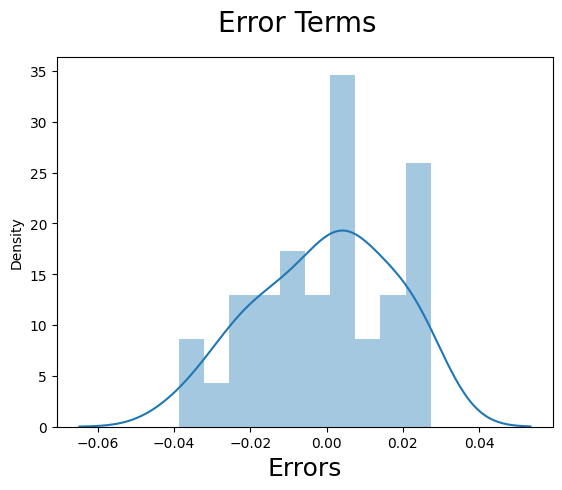

Text(0, 0.5, 'y_pred')

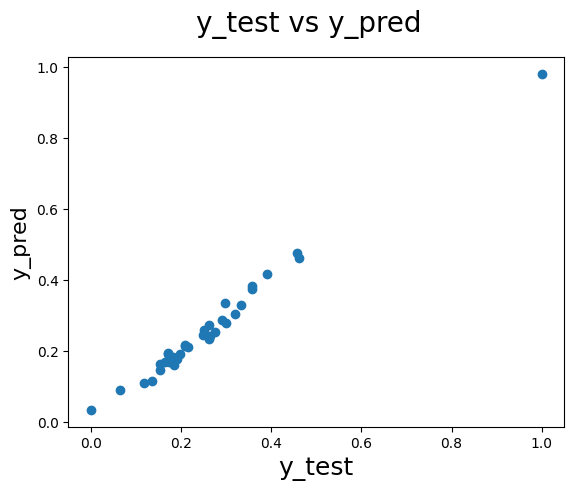

In [539]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


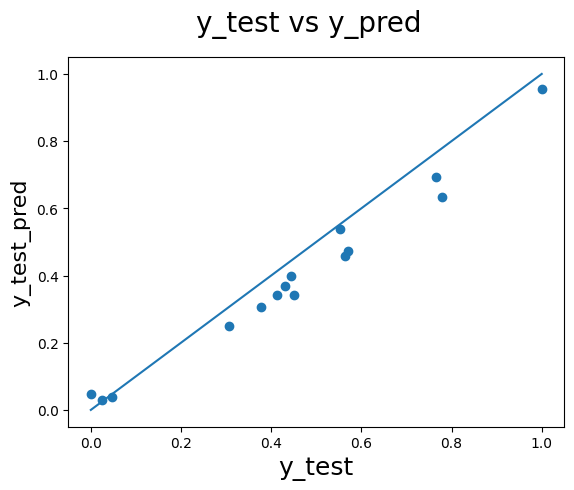

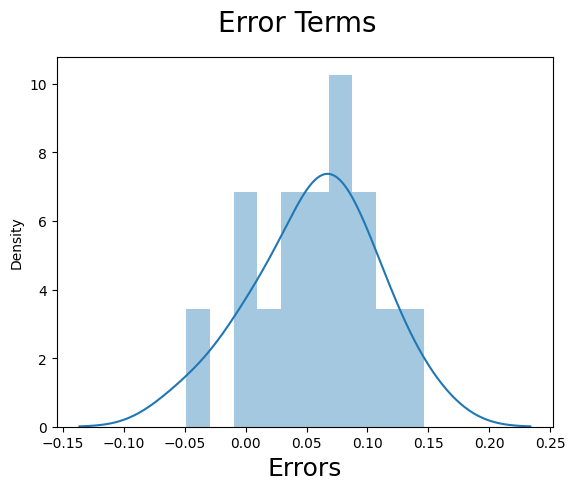

In [540]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Multiplicative

In [165]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

In [541]:
ha_wk[ha_wk.columns]=nm.log(ha_wk[ha_wk.columns])

ha_wk=ha_wk.replace([nm.inf, -nm.inf], 0)
ha_wk=ha_wk.fillna(0)

# ha_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [542]:
df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [543]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=18, step=1)
selector.fit(X_train, y_train)

df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'pay_day_in_wk', 'mean_temp_c', 'cool_deg_c',
       'total_rain', 'total_snow', 'TV_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'SEM_AD', 'cod_per'],
      dtype='object')

In [544]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.445e+05
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           8.90e-45
Time:                        17:33:54   Log-Likelihood:                 218.41
No. Observations:                  35   AIC:                            -404.8
Df Residuals:                      19   BIC:                            -379.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
13            Affiliates_AD  24099.34
12      Online_marketing_AD  21387.60
2             listing_price   1630.58
3              discount_per   1531.43
11                    TV_AD    310.12
15                  cod_per     57.36
0                      week     52.13
1   product_procurement_sla     30.51
5                       NPS     15.14
7               mean_temp_c     15.10
14                   SEM_AD     12.29
4               Stock_Index     12.23
9                total_rain     10.21
10               total_snow      9.86
8                cool_deg_c      7.56
6             pay_day_in_wk       NaN

In [545]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.611e+05
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.41e-47
Time:                        17:34:05   Log-Likelihood:                 218.20
No. Observations:                  35   AIC:                            -406.4
Df Residuals:                      20   BIC:                            -383.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
2             listing_price  1372.73
3              discount_per  1312.79
12      Online_marketing_AD   279.45
11                    TV_AD   151.67
14                  cod_per    56.91
0                      week    47.72
1   product_procurement_sla    30.49
7               mean_temp_c    13.49
5                       NPS    11.40
4               Stock_Index    11.38
9                total_rain    10.11
10               total_snow     9.79
8                cool_deg_c     7.42
13                   SEM_AD     6.57
6             pay_day_in_wk      NaN

In [546]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     177.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.97e-18
Time:                        17:34:13   Log-Likelihood:                 97.024
No. Observations:                  35   AIC:                            -166.0
Df Residuals:                      21   BIC:                            -144.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
11      Online_marketing_AD  241.26
10                    TV_AD  142.03
13                  cod_per   53.95
0                      week   45.65
2              discount_per   30.14
1   product_procurement_sla   28.68
6               mean_temp_c   13.46
4                       NPS   11.09
3               Stock_Index   10.34
8                total_rain   10.11
9                total_snow    9.60
7                cool_deg_c    6.86
12                   SEM_AD    5.89
5             pay_day_in_wk     NaN

In [547]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     177.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.97e-18
Time:                        17:34:20   Log-Likelihood:                 97.024
No. Observations:                  35   AIC:                            -166.0
Df Residuals:                      21   BIC:                            -144.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
10      Online_marketing_AD  241.26
9                     TV_AD  142.03
12                  cod_per   53.95
0                      week   45.65
2              discount_per   30.14
1   product_procurement_sla   28.68
5               mean_temp_c   13.46
4                       NPS   11.09
3               Stock_Index   10.34
7                total_rain   10.11
8                total_snow    9.60
6                cool_deg_c    6.86
11                   SEM_AD    5.89

In [548]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.67e-19
Time:                        17:34:26   Log-Likelihood:                 95.029
No. Observations:                  35   AIC:                            -164.1
Df Residuals:                      22   BIC:                            -143.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
9                     TV_AD  63.67
11                  cod_per  53.60
0                      week  30.73
1   product_procurement_sla  27.94
2              discount_per  27.37
5               mean_temp_c  13.18
7                total_rain   9.95
8                total_snow   9.58
4                       NPS   8.41
3               Stock_Index   7.91
6                cool_deg_c   6.86
10                   SEM_AD   5.88

In [549]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     203.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.50e-20
Time:                        17:34:33   Log-Likelihood:                 94.869
No. Observations:                  35   AIC:                            -165.7
Df Residuals:                      23   BIC:                            -147.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
10                  cod_per  53.48
2              discount_per  26.86
1   product_procurement_sla  22.66
5               mean_temp_c  10.96
7                total_rain   9.90
8                total_snow   9.35
0                      week   8.92
4                       NPS   8.25
3               Stock_Index   5.78
9                    SEM_AD   5.04
6                cool_deg_c   4.70

In [550]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     218.3
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.77e-21
Time:                        17:34:39   Log-Likelihood:                 93.747
No. Observations:                  35   AIC:                            -165.5
Df Residuals:                      24   BIC:                            -148.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1  product_procurement_sla  19.88
2             discount_per  11.81
5              mean_temp_c  10.93
7               total_rain   9.29
8               total_snow   9.28
0                     week   8.43
4                      NPS   8.11
3              Stock_Index   5.73
9                   SEM_AD   5.04
6               cool_deg_c   3.76

In [551]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     243.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.63e-22
Time:                        17:34:45   Log-Likelihood:                 93.084
No. Observations:                  35   AIC:                            -166.2
Df Residuals:                      25   BIC:                            -150.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0538      0.038     -1.401   

Features    VIF
1  discount_per  11.16
4   mean_temp_c  10.67
7    total_snow   9.02
6    total_rain   8.68
0          week   7.59
3           NPS   7.01
2   Stock_Index   5.72
8        SEM_AD   5.01
5    cool_deg_c   3.75

In [552]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     283.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.71e-23
Time:                        17:34:58   Log-Likelihood:                 93.045
No. Observations:                  35   AIC:                            -168.1
Df Residuals:                      26   BIC:                            -154.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0496      0.033     -1.487   

Features    VIF
1  discount_per  11.05
4   mean_temp_c  10.64
0          week   7.26
6    total_snow   7.05
3           NPS   5.94
2   Stock_Index   5.66
7        SEM_AD   5.00
5    cool_deg_c   3.49

In [553]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     335.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.50e-24
Time:                        17:35:09   Log-Likelihood:                 92.966
No. Observations:                  35   AIC:                            -169.9
Df Residuals:                      27   BIC:                            -157.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0453      0.030     -1.491   

Features    VIF
1  discount_per  10.87
0          week   7.07
5    total_snow   7.00
3           NPS   5.72
2   Stock_Index   5.02
6        SEM_AD   3.59
4    cool_deg_c   2.08

In [554]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     396.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           9.65e-26
Time:                        17:35:17   Log-Likelihood:                 92.578
No. Observations:                  35   AIC:                            -171.2
Df Residuals:                      28   BIC:                            -160.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0468      0.030     -1.556   

Features    VIF
1  discount_per  10.53
0          week   6.74
4    total_snow   6.66
2           NPS   4.73
5        SEM_AD   3.11
3    cool_deg_c   2.08

In [555]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     487.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.90e-27
Time:                        17:35:25   Log-Likelihood:                 92.360
No. Observations:                  35   AIC:                            -172.7
Df Residuals:                      29   BIC:                            -163.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0334      0.020     -1.704   

Features   VIF
0  discount_per  8.53
3    total_snow  5.84
1           NPS  4.64
4        SEM_AD  3.10
2    cool_deg_c  2.06

In [556]:
features=features.drop('total_snow',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     605.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.25e-28
Time:                        17:35:33   Log-Likelihood:                 91.684
No. Observations:                  35   AIC:                            -173.4
Df Residuals:                      30   BIC:                            -165.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0223      0.017     -1.338   

Features   VIF
0  discount_per  5.74
1           NPS  4.26
3        SEM_AD  3.10
2    cool_deg_c  2.06

In [562]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     704.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.37e-28
Time:                        17:36:54   Log-Likelihood:                 88.762
No. Observations:                  35   AIC:                            -169.5
Df Residuals:                      31   BIC:                            -163.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0022      0.014      0.158   

Features   VIF
0  discount_per  3.07
2        SEM_AD  2.75
1    cool_deg_c  1.20

In [563]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9161.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    5.17e-47
Time:                        17:36:56   Log-Likelihood:                          88.747
No. Observations:                  35   AIC:                                     -171.5
Df Residuals:                      32   BIC:                                     -166.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

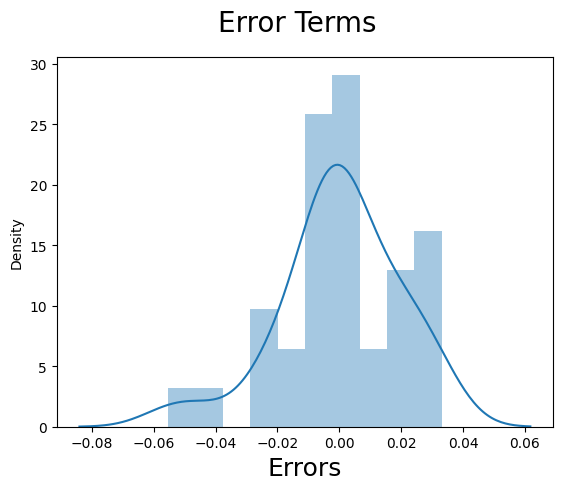

Text(0, 0.5, 'y_pred')

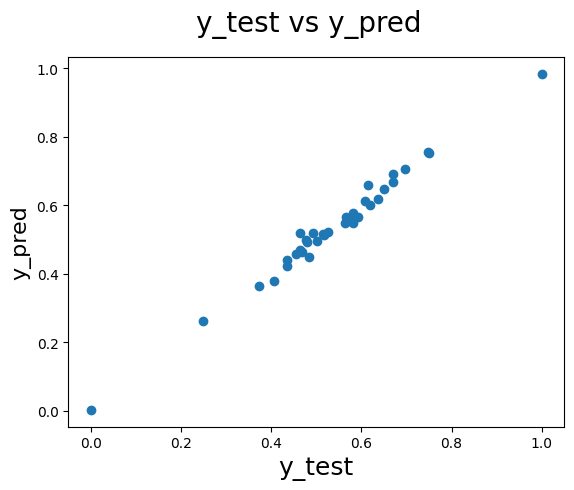

In [564]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


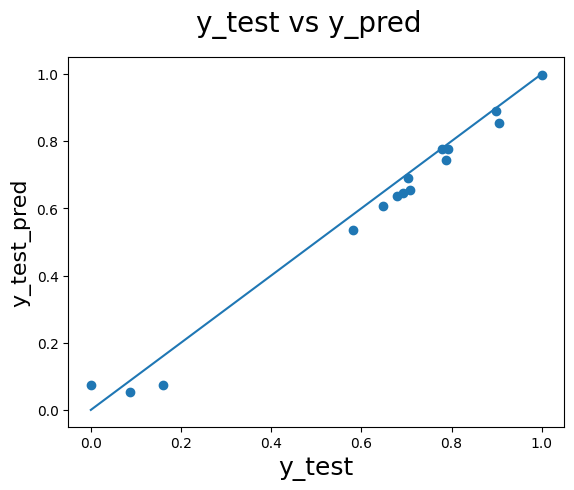

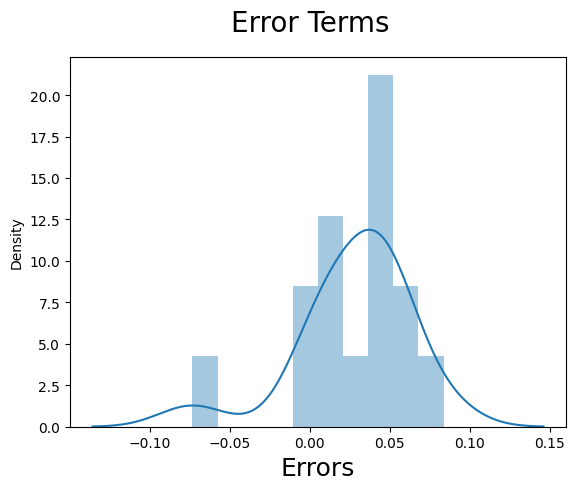

In [565]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


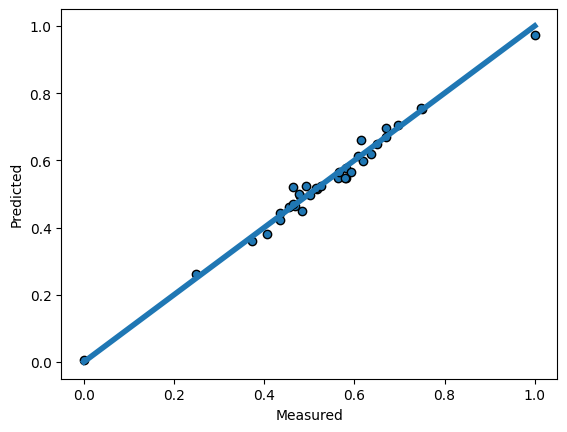

In [566]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [561]:
features

Index(['discount_per', 'NPS', 'cool_deg_c', 'SEM_AD'], dtype='object')

Gaming Accessories

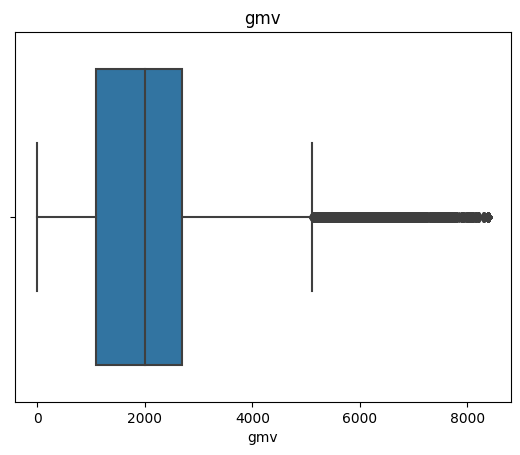

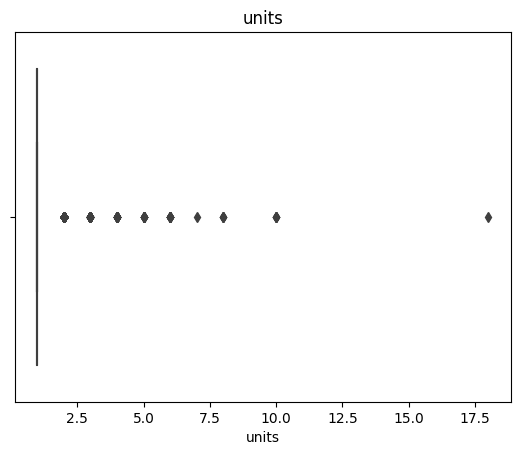

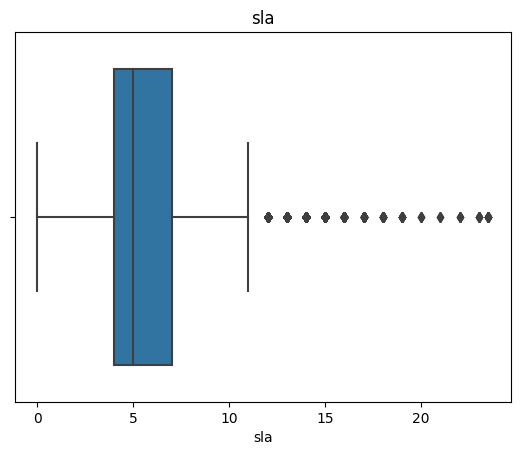

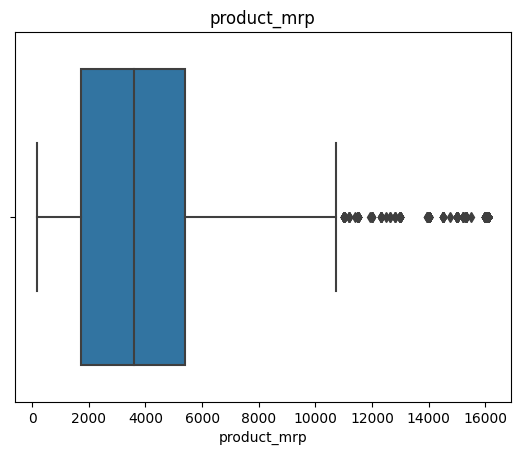

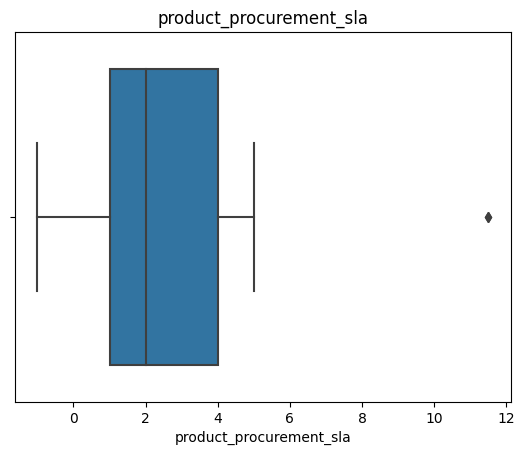

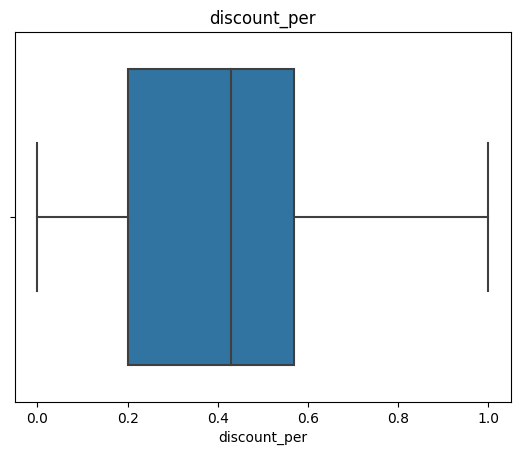

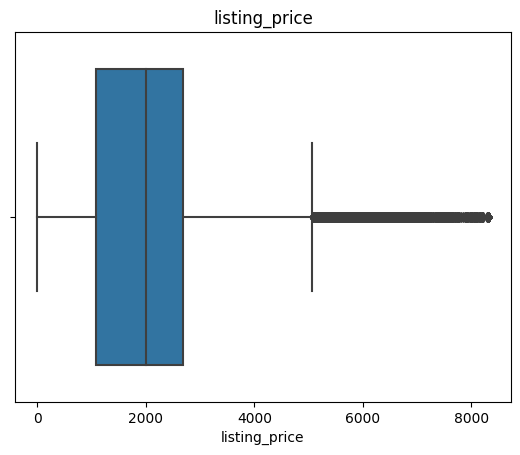

In [567]:
game=EleData3[EleData3.product_analytic_sub_category=='gamingaccessory']
# game.discount_per
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()

In [568]:


q1=game['product_mrp'].quantile(0.25)
q3=game['product_mrp'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_mrp']>up,'product_mrp']=up
game.loc[game['product_mrp']<lw,'product_mrp']=lw


q1=game['gmv'].quantile(0.25)
q3=game['gmv'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['gmv']>up,'gmv']=up
game.loc[game['gmv']<lw,'gmv']=lw


q1=game['listing_price'].quantile(0.25)
q3=game['listing_price'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['listing_price']>up,'listing_price']=up
game.loc[game['listing_price']<lw,'listing_price']=lw


q1=game['discount_per'].quantile(0.25)
q3=game['discount_per'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# game[game['discount_per']>1.39]
q1=game['sla'].quantile(0.25)
q3=game['sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['sla']>up,'sla']=up
game.loc[game['sla']<lw,'sla']=lw
q1=game['product_procurement_sla'].quantile(0.25)
q3=game['product_procurement_sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_procurement_sla']>up,'product_procurement_sla']=up
game.loc[game['product_procurement_sla']<lw,'product_procurement_sla']=lw


-2924.5   5273.5
-1552.0   2776.0
-1488.5   2667.5
-1.07   1.9700000000000002
-12.5   23.5
-5.5   10.5


In [569]:
game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

game_wk=pd.merge(game_wk,weekly_kpis,on='week')

game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

game_wk.order_payment_type.value_counts()
game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
game_wk.drop("order_payment_cod",1,inplace=True)
game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
game_wk.drop('num_of_sales',1,inplace=True)

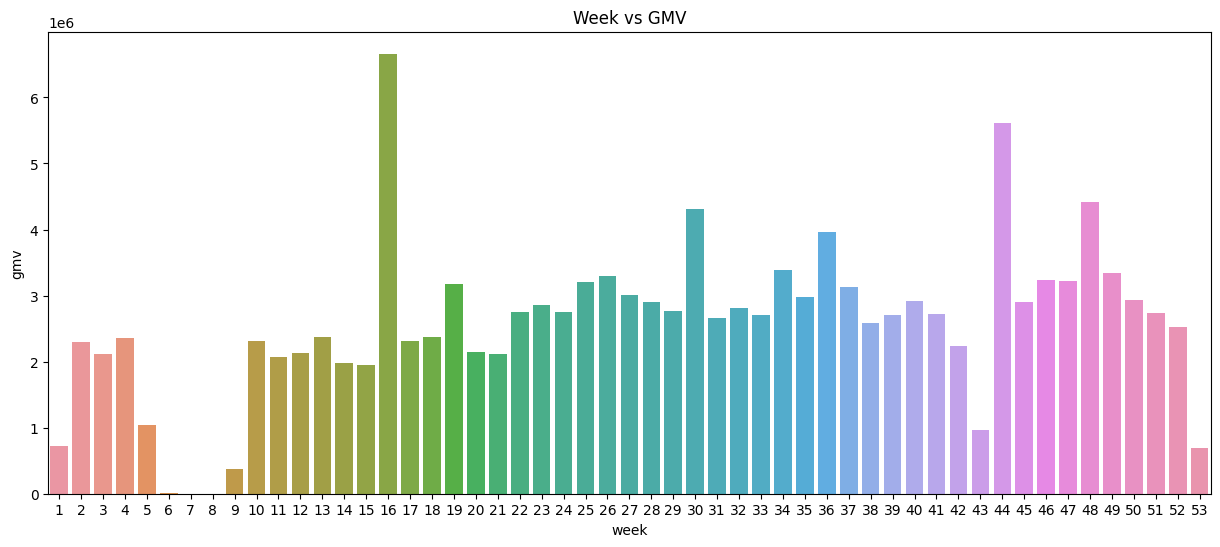

In [570]:
plt.figure(figsize=(15,6))
sns.barplot(x=game_wk['week'],y=game_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
## 16 , 19, 20, 34, 36, 44

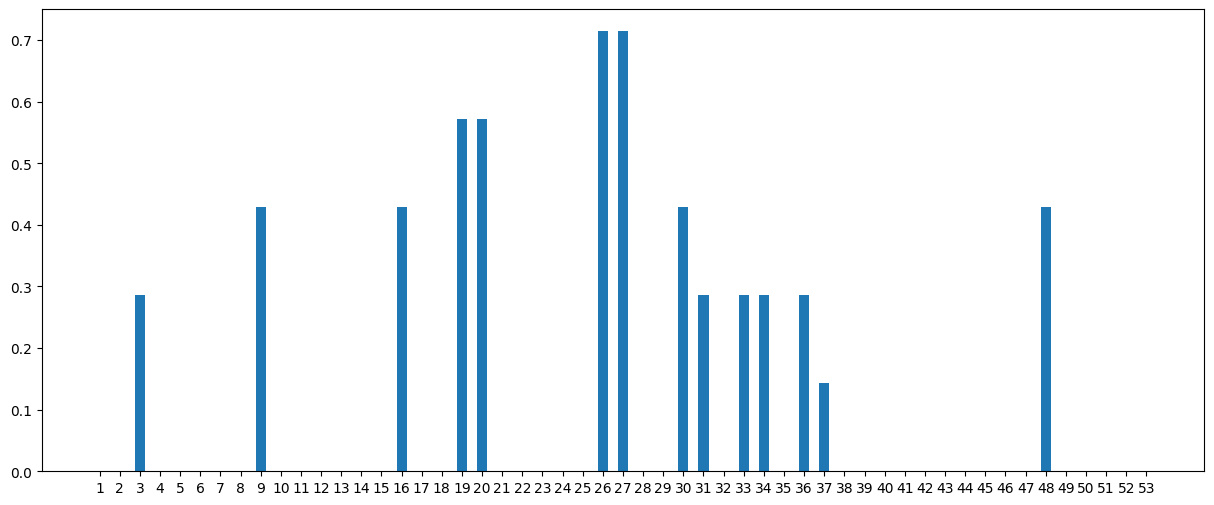

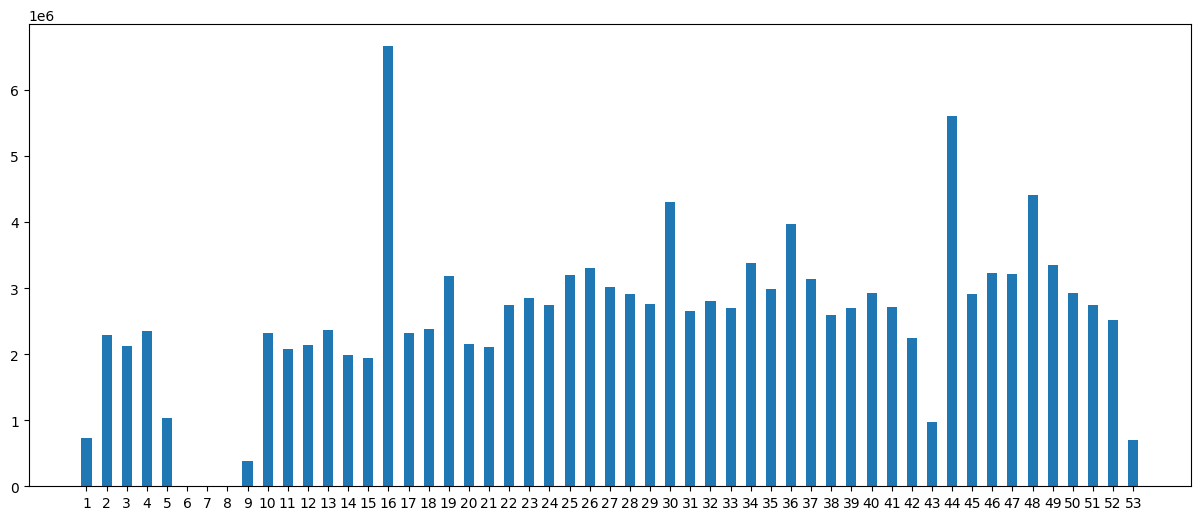

In [573]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=game_wk['week'],height=game_wk['sales_per'],width=width)
plt.xticks(game_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['gmv'],width=width)
plt.xticks(game_wk['week'])
plt.show()


## sales per as impact

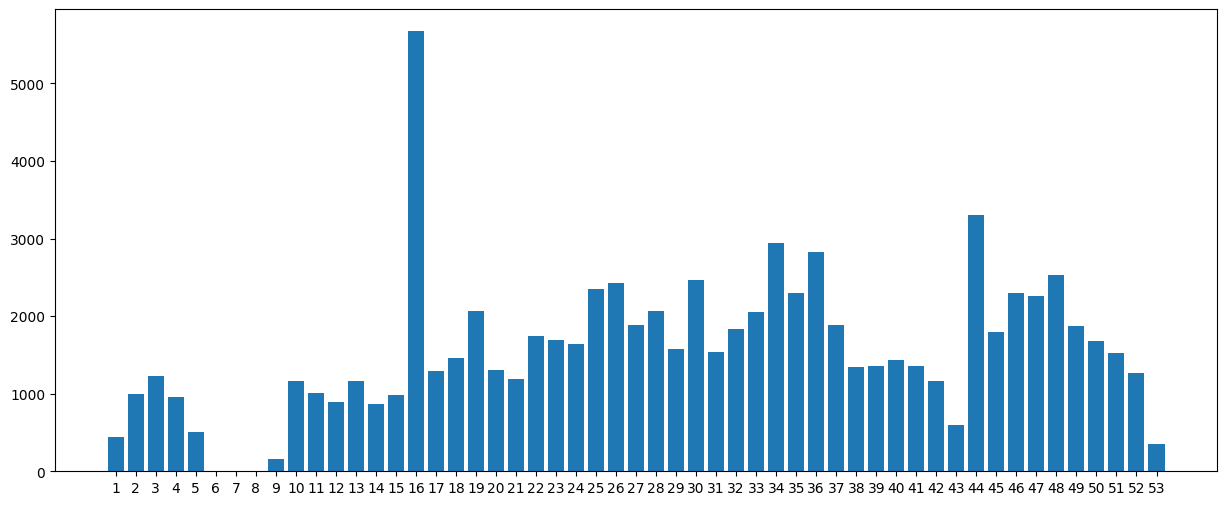

In [574]:
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['discount_per'])
plt.xticks(game_wk['week'])
plt.show()

## not very much changes because of discount


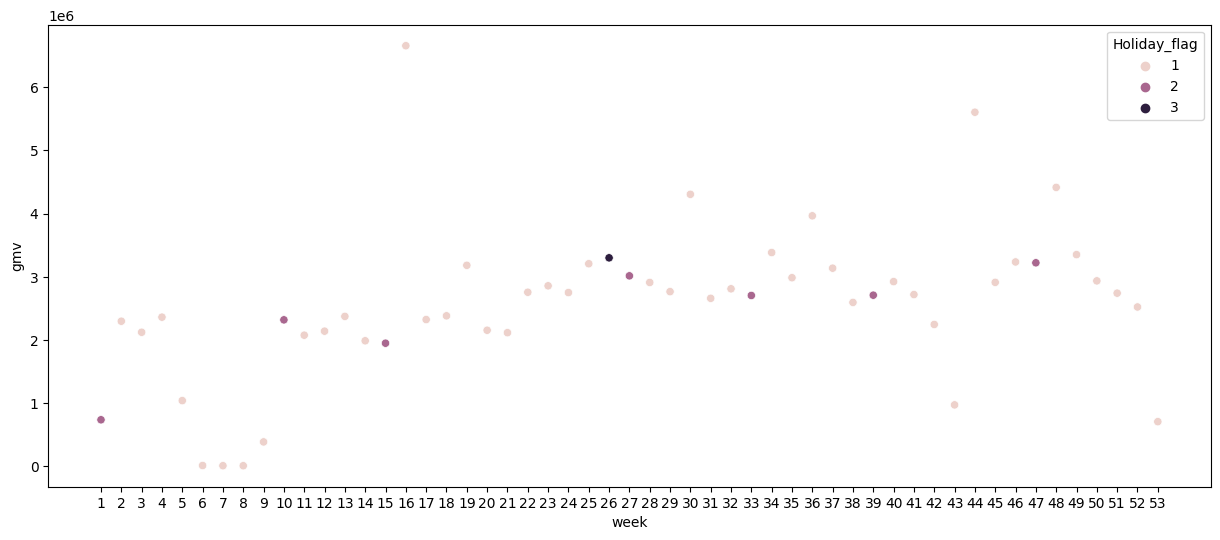

In [576]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=game_wk['week'],y=game_wk['gmv'],hue=game_wk['Holiday_flag'])
plt.xticks(game_wk['week'])
plt.show()


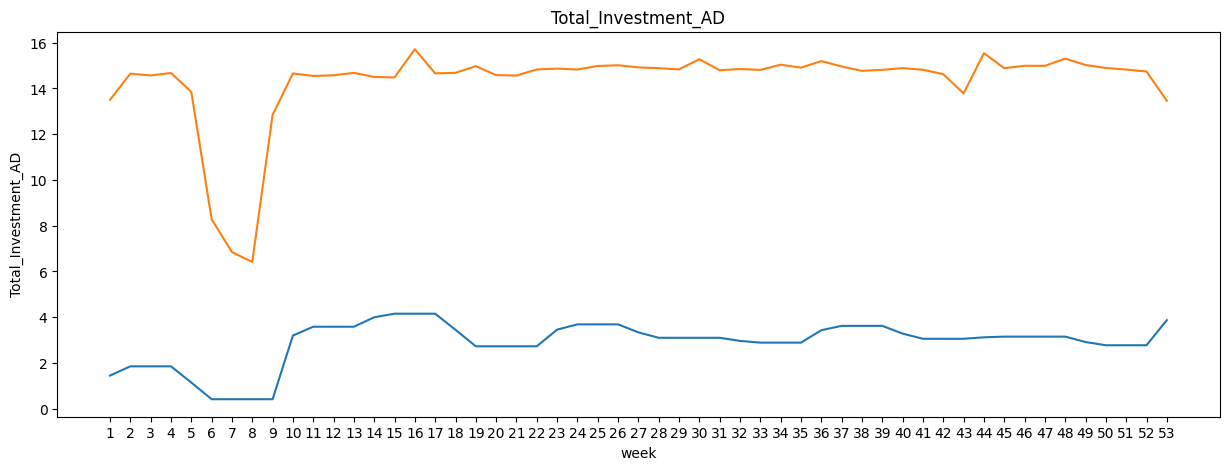

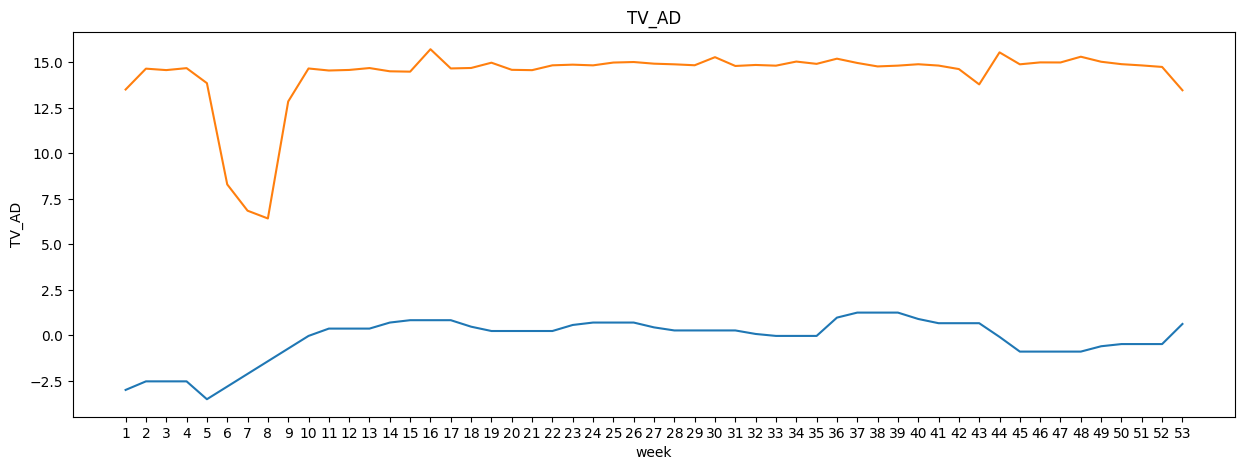

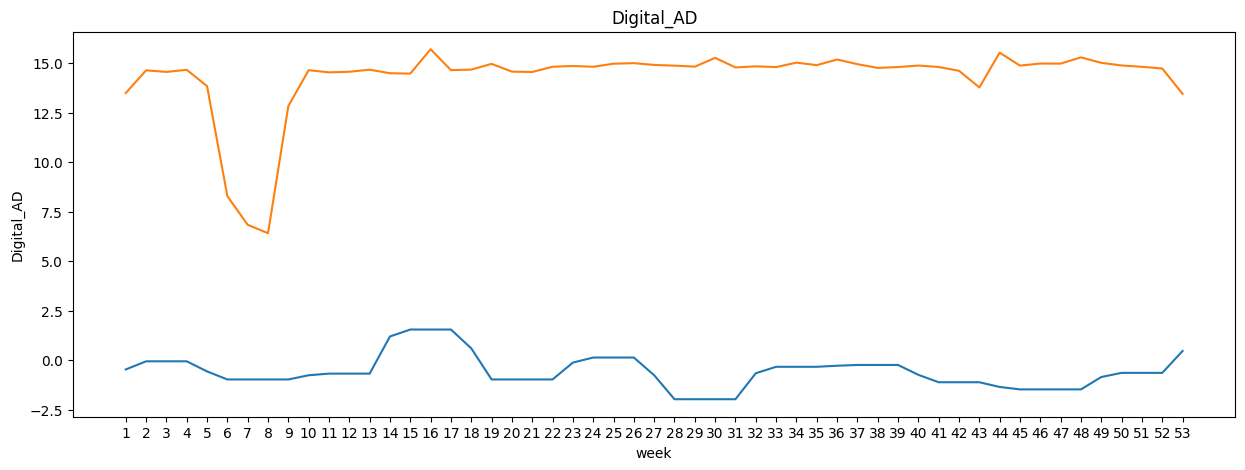

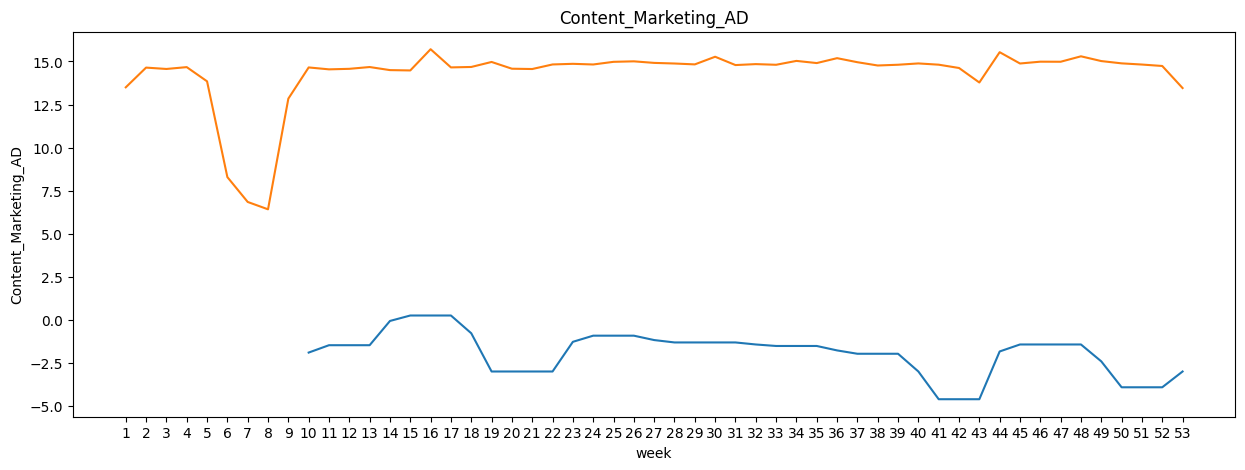

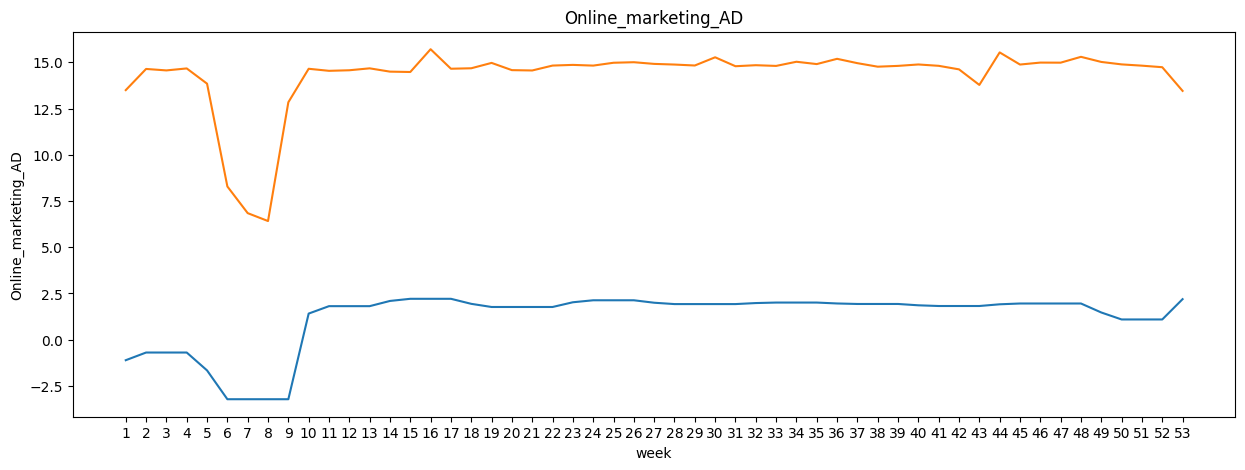

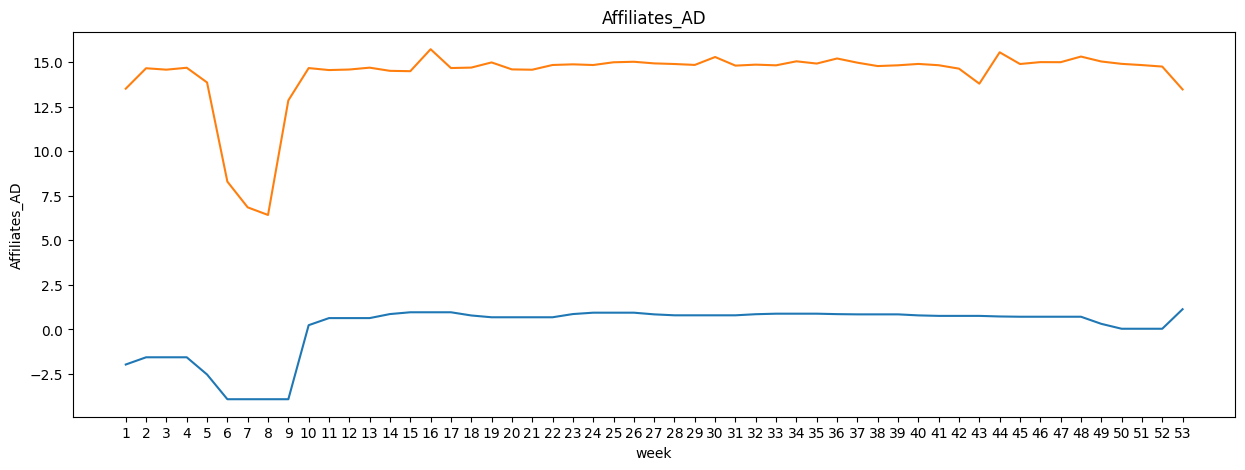

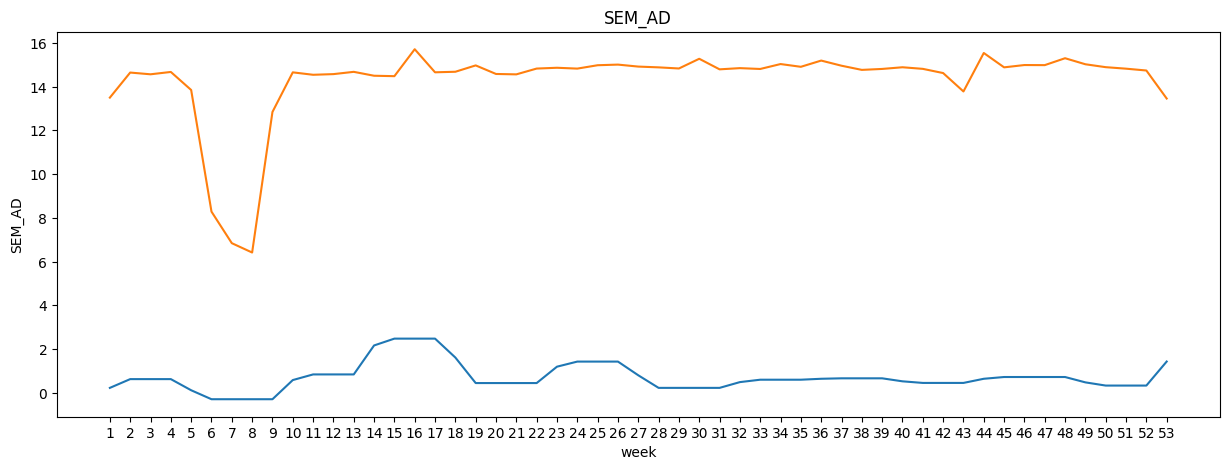

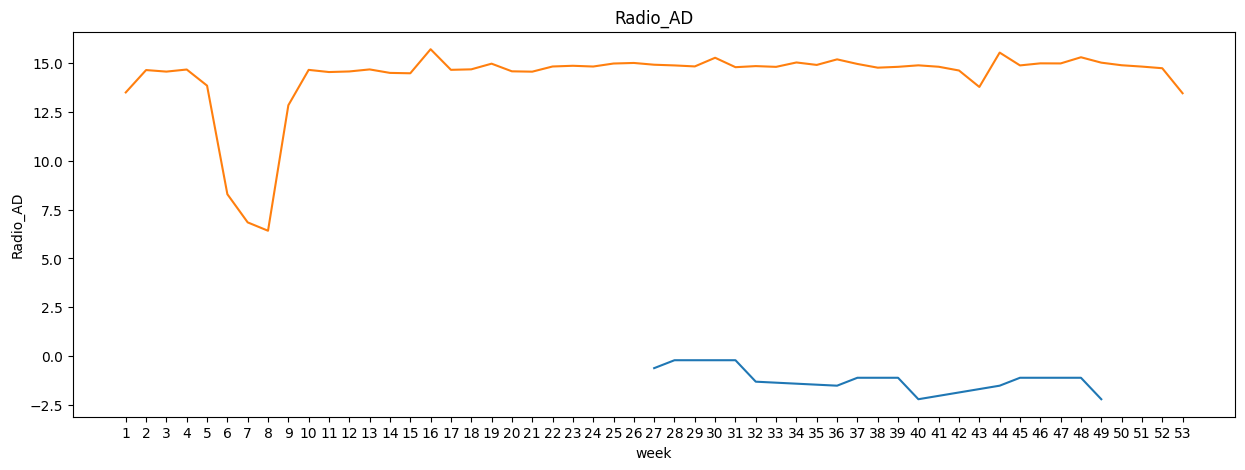

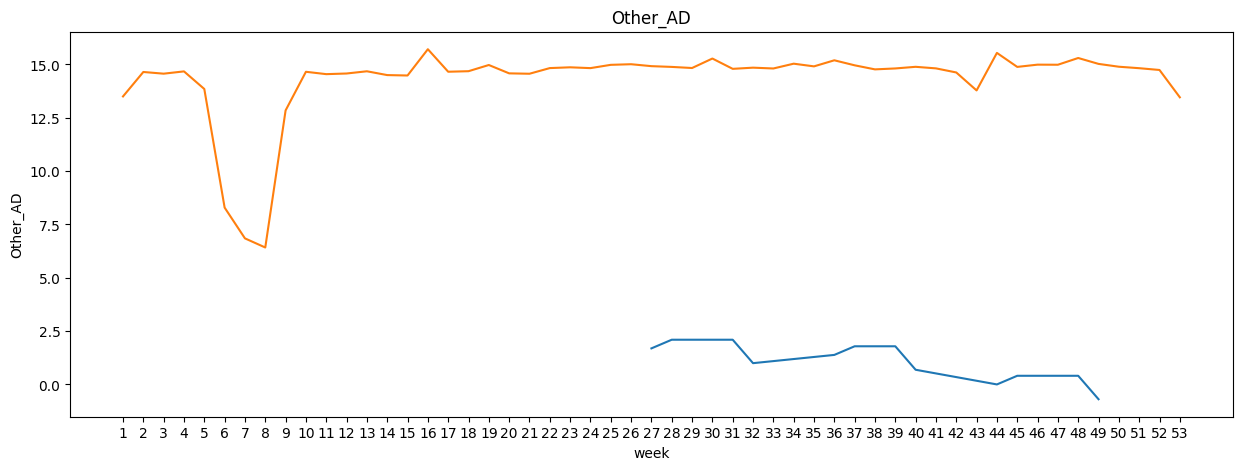

In [577]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk[i]))
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk['gmv']))
    plt.xticks(game_wk['week'])
    x=x+1
    plt.show()

## affiliates , digital and other and total


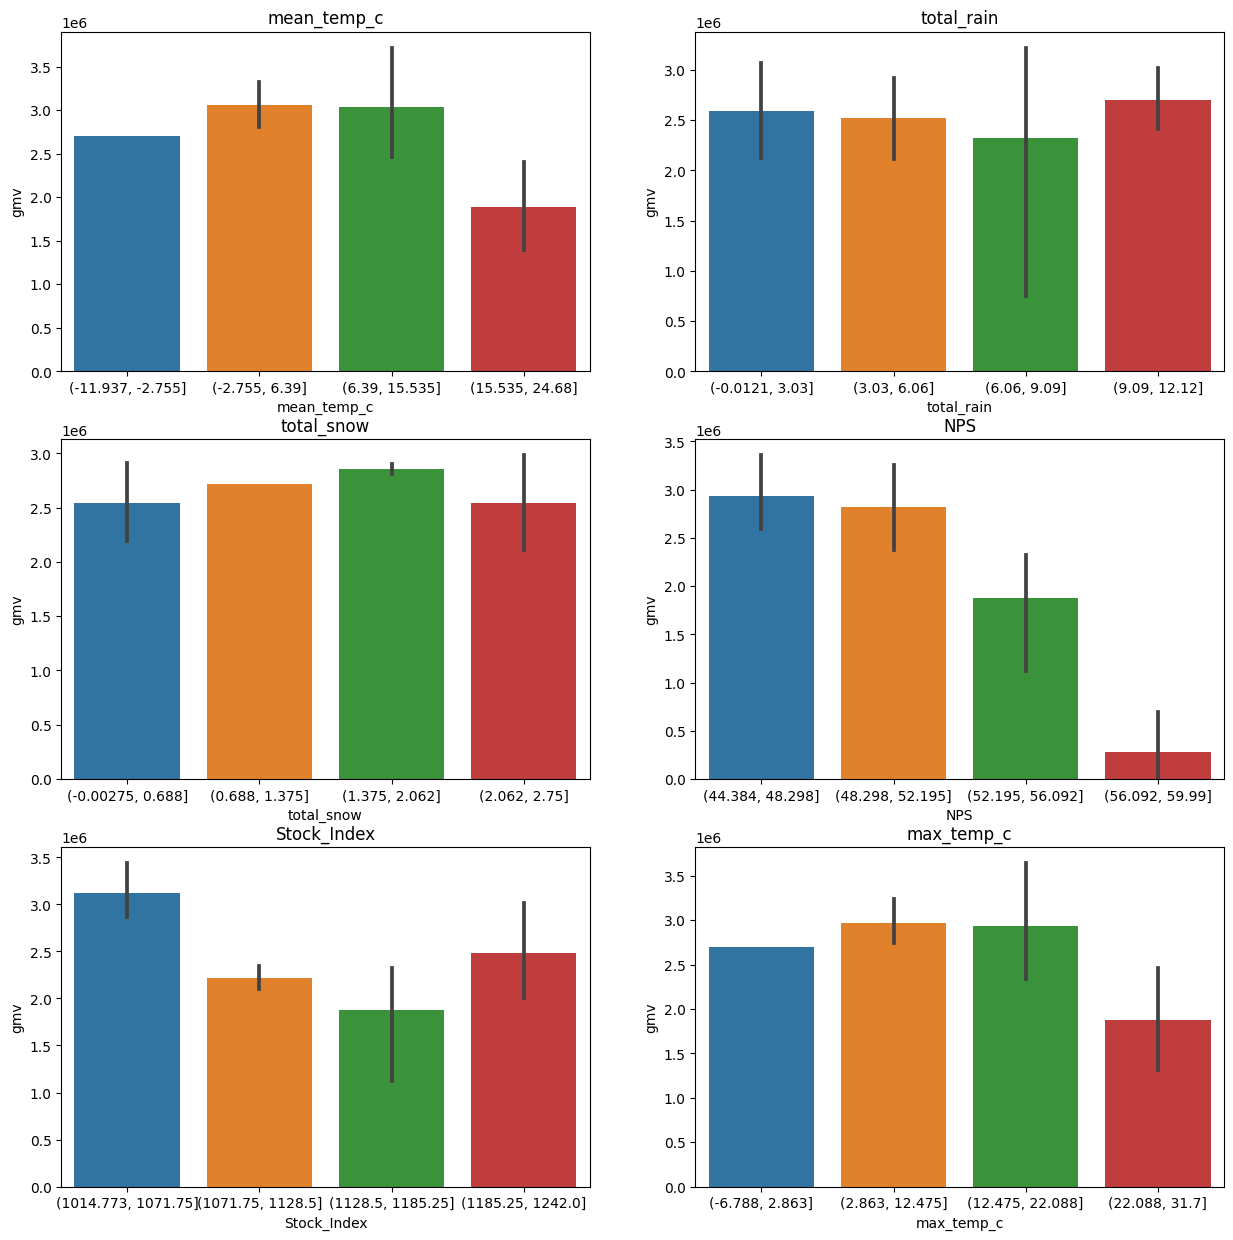

In [578]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=4))
  x=x+1

  ## max temp can be kept


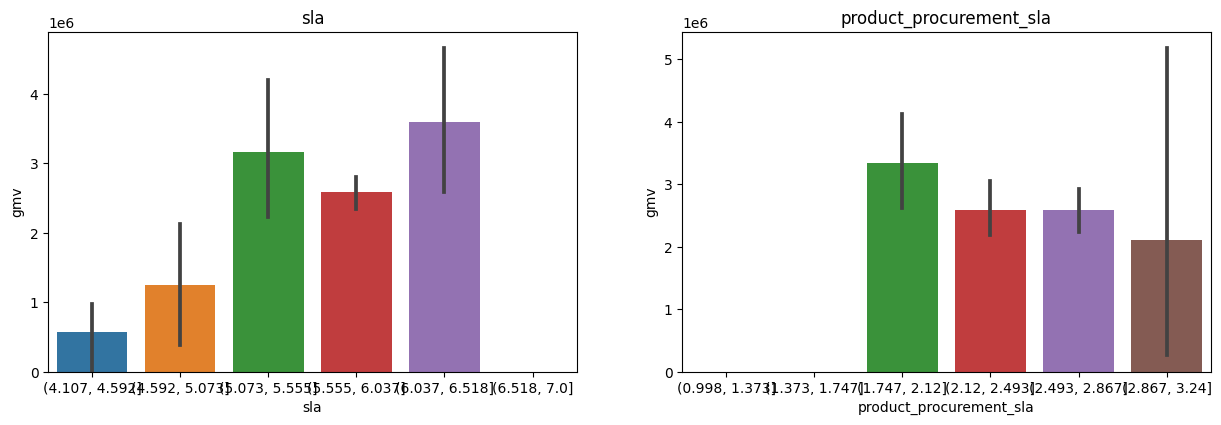

In [580]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=6))
  x=x+1

## sla not required

In [581]:
game_wk.drop(['order_count','units','Other_AD','product_mrp','sla','total_snow','total_rain','cool_deg_c','max_temp_c','Affiliates_AD',
              'Digital_AD','Other_AD'],1,inplace=True)

In [582]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']


In [583]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)


RFE(estimator=SVR(kernel='linear'), n_features_to_select=15)

In [584]:
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'pay_day_in_wk', 'mean_temp_c',
       'Total_Investment_AD', 'TV_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'SEM_AD', 'Radio_AD', 'sales_per'],
      dtype='object')

In [585]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.426e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           9.00e-44
Time:                        17:49:04   Log-Likelihood:                 203.03
No. Observations:                  37   AIC:                            -374.1
Df Residuals:                      21   BIC:                            -348.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
10     Content_Marketing_AD  323.88
8       Total_Investment_AD  303.86
12                   SEM_AD  217.09
2             listing_price  132.24
3              discount_per   86.23
11      Online_marketing_AD   68.75
9                     TV_AD   56.79
7               mean_temp_c   19.38
4               Stock_Index   16.81
1   product_procurement_sla   14.63
0                      week   14.23
5                       NPS   13.33
13                 Radio_AD   12.17
6             pay_day_in_wk    3.17
14                sales_per    2.19

In [586]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.714e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           6.99e-46
Time:                        18:11:25   Log-Likelihood:                 202.06
No. Observations:                  37   AIC:                            -374.1
Df Residuals:                      22   BIC:                            -350.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
8       Total_Investment_AD  196.86
2             listing_price   84.61
10      Online_marketing_AD   66.58
3              discount_per   66.56
11                   SEM_AD   33.85
9                     TV_AD   22.34
4               Stock_Index   16.80
7               mean_temp_c   16.79
1   product_procurement_sla   14.54
0                      week   14.04
5                       NPS   12.88
12                 Radio_AD    3.37
6             pay_day_in_wk    3.06
13                sales_per    2.17

In [587]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.921e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           7.02e-48
Time:                        18:11:32   Log-Likelihood:                 200.66
No. Observations:                  37   AIC:                            -373.3
Df Residuals:                      23   BIC:                            -350.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             listing_price  83.10
3              discount_per  64.50
9       Online_marketing_AD  30.49
0                      week  13.73
1   product_procurement_sla  13.51
8                     TV_AD  13.27
4               Stock_Index  12.08
5                       NPS  11.12
7               mean_temp_c   8.39
10                   SEM_AD   6.40
11                 Radio_AD   3.32
6             pay_day_in_wk   3.06
12                sales_per   2.04

In [588]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     26.65
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.93e-11
Time:                        18:11:43   Log-Likelihood:                 60.592
No. Observations:                  37   AIC:                            -95.18
Df Residuals:                      24   BIC:                            -74.24
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8       Online_marketing_AD  29.32
0                      week  13.67
1   product_procurement_sla  13.17
7                     TV_AD  12.87
3               Stock_Index  11.93
4                       NPS  11.12
2              discount_per  10.74
6               mean_temp_c   6.05
9                    SEM_AD   5.86
5             pay_day_in_wk   3.04
10                 Radio_AD   2.92
11                sales_per   1.95

In [589]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     30.24
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.06e-11
Time:                        18:11:54   Log-Likelihood:                 60.566
No. Observations:                  37   AIC:                            -97.13
Df Residuals:                      25   BIC:                            -77.80
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                      week  12.57
1   product_procurement_sla  12.12
2              discount_per  10.65
3               Stock_Index   9.88
4                       NPS   8.32
7                     TV_AD   8.21
6               mean_temp_c   6.01
8                    SEM_AD   5.67
5             pay_day_in_wk   2.98
9                  Radio_AD   2.45
10                sales_per   1.94

In [590]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     34.53
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.77e-12
Time:                        18:12:00   Log-Likelihood:                 60.532
No. Observations:                  37   AIC:                            -99.06
Df Residuals:                      26   BIC:                            -81.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0  product_procurement_sla  8.34
3                      NPS  8.31
2              Stock_Index  7.31
1             discount_per  6.41
5              mean_temp_c  5.41
7                   SEM_AD  3.92
6                    TV_AD  3.81
4            pay_day_in_wk  2.85
8                 Radio_AD  2.01
9                sales_per  1.80

In [591]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     39.77
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.75e-13
Time:                        18:12:19   Log-Likelihood:                 60.502
No. Observations:                  37   AIC:                            -101.0
Df Residuals:                      27   BIC:                            -84.90
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
3                      NPS  8.31
0  product_procurement_sla  8.29
2              Stock_Index  6.82
1             discount_per  6.35
4              mean_temp_c  5.41
6                   SEM_AD  3.81
5                    TV_AD  3.68
7                 Radio_AD  2.00
8                sales_per  1.59

In [592]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     46.20
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.10e-14
Time:                        18:12:31   Log-Likelihood:                 60.426
No. Observations:                  37   AIC:                            -102.9
Df Residuals:                      28   BIC:                            -88.35
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0  product_procurement_sla  7.22
2                      NPS  5.38
3              mean_temp_c  5.22
1             discount_per  5.12
4                    TV_AD  3.66
5                   SEM_AD  3.24
6                 Radio_AD  2.00
7                sales_per  1.59

In [593]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     53.43
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           7.19e-15
Time:                        18:12:42   Log-Likelihood:                 60.027
No. Observations:                  37   AIC:                            -104.1
Df Residuals:                      29   BIC:                            -91.17
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0  product_procurement_sla  5.26
1             discount_per  4.90
3                    TV_AD  3.66
2              mean_temp_c  2.64
4                   SEM_AD  2.34
5                 Radio_AD  2.00
6                sales_per  1.59

In [594]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     62.16
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.41e-15
Time:                        18:13:01   Log-Likelihood:                 59.400
No. Observations:                  37   AIC:                            -104.8
Df Residuals:                      30   BIC:                            -93.52
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0  product_procurement_sla  5.25
1             discount_per  4.61
3                    TV_AD  3.11
2              mean_temp_c  2.64
4                 Radio_AD  1.72
5                sales_per  1.58

In [595]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     73.34
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.06e-16
Time:                        18:13:28   Log-Likelihood:                 58.548
No. Observations:                  37   AIC:                            -105.1
Df Residuals:                      31   BIC:                            -95.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
1             discount_per  4.55
0  product_procurement_sla  3.94
2                    TV_AD  3.11
4                sales_per  1.55
3                 Radio_AD  1.50

In [596]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     94.51
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.98e-17
Time:                        18:13:42   Log-Likelihood:                 58.527
No. Observations:                  37   AIC:                            -107.1
Df Residuals:                      32   BIC:                            -99.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
1             discount_per  3.89
0  product_procurement_sla  3.40
3                sales_per  1.50
2                 Radio_AD  1.48

In [598]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     123.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.95e-18
Time:                        18:14:04   Log-Likelihood:                 57.707
No. Observations:                  37   AIC:                            -107.4
Df Residuals:                      33   BIC:                            -101.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
1             discount_per  3.64
0  product_procurement_sla  3.40
2                 Radio_AD  1.37

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              355.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    1.00e-25
Time:                        18:14:06   Log-Likelihood:                          42.462
No. Observations:                  37   AIC:                                     -78.92
Df Residuals:                      34   BIC:                                     -74.09
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

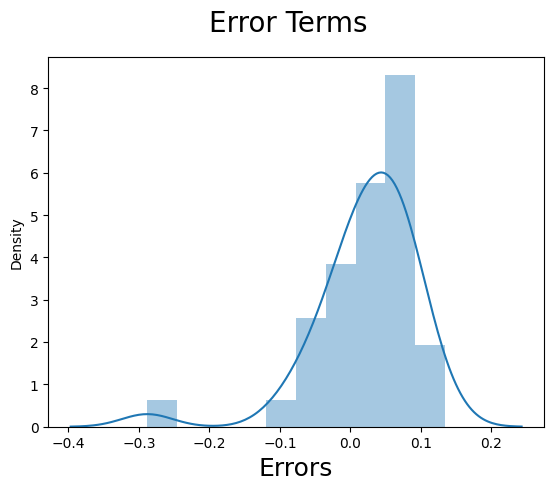

Text(0, 0.5, 'y_pred')

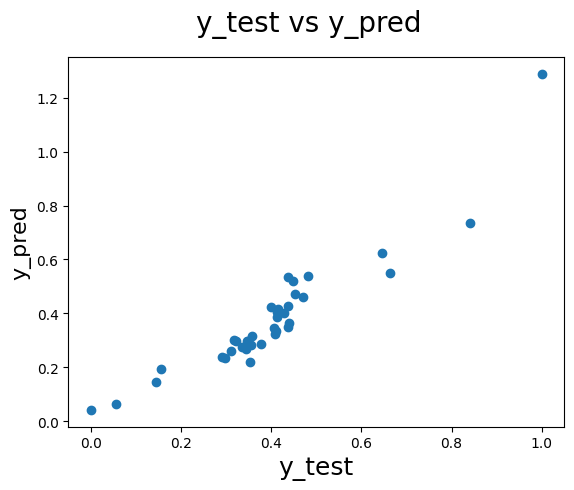

In [599]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


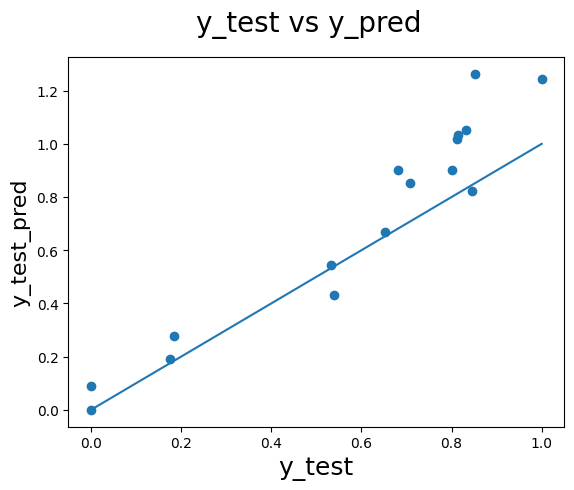

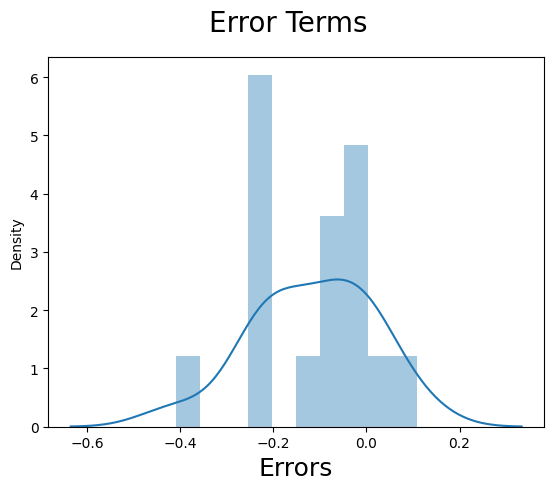

In [600]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


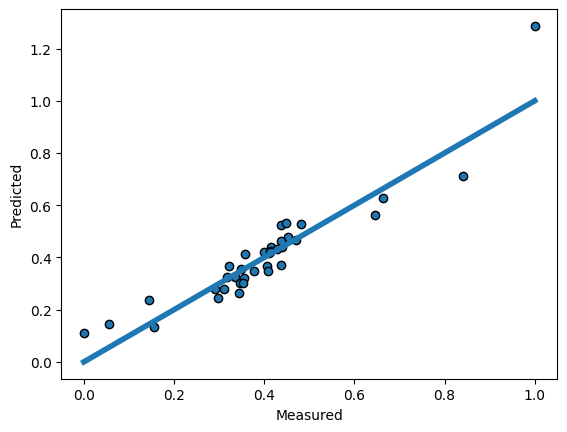

In [601]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [208]:
# game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# game_wk=pd.merge(game_wk,weekly_kpis,on='week')

# game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# game_wk.order_payment_type.value_counts()
# game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
# game_wk.drop("order_payment_cod",1,inplace=True)
# game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

# game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
# game_wk.drop('num_of_sales',1,inplace=True)
# game_wk.drop(['order_count','units','Other_AD','product_mrp'],1,inplace=True)

In [602]:
# multiplicative
game_wk[game_wk.columns]=nm.log(game_wk[game_wk.columns])


In [603]:

game_wk=game_wk.replace([nm.inf, -nm.inf], 0)
game_wk=game_wk.fillna(0)

# game_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [632]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [640]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)
selector.fit(X_train, y_train)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'NPS', 'mean_temp_c', 'Total_Investment_AD', 'TV_AD',
       'Online_marketing_AD', 'SEM_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [641]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.875e+05
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.21e-60
Time:                        18:21:04   Log-Likelihood:                 242.07
No. Observations:                  37   AIC:                            -458.1
Df Residuals:                      24   BIC:                            -437.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
3              discount_per  3724.83
2             listing_price  3273.00
8       Online_marketing_AD   460.99
6       Total_Investment_AD   435.60
0                      week    48.39
7                     TV_AD    36.29
9                    SEM_AD    21.29
11                sales_per    17.27
10                  cod_per    15.56
4                       NPS    14.72
1   product_procurement_sla    14.11
5               mean_temp_c    10.59

In [642]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.33e-22
Time:                        18:21:15   Log-Likelihood:                 101.55
No. Observations:                  37   AIC:                            -179.1
Df Residuals:                      25   BIC:                            -159.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
7       Online_marketing_AD  382.86
5       Total_Investment_AD  352.69
2              discount_per  107.07
0                      week   38.42
6                     TV_AD   33.88
8                    SEM_AD   17.23
10                sales_per   15.00
9                   cod_per   14.59
3                       NPS   13.61
1   product_procurement_sla   11.55
4               mean_temp_c   10.44

In [643]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     203.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.55e-22
Time:                        18:21:24   Log-Likelihood:                 97.779
No. Observations:                  37   AIC:                            -173.6
Df Residuals:                      26   BIC:                            -155.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
6      Online_marketing_AD  146.50
2             discount_per  106.28
0                     week   38.33
5                    TV_AD   30.29
9                sales_per   14.59
8                  cod_per   14.55
3                      NPS   12.62
1  product_procurement_sla   10.82
7                   SEM_AD   10.16
4              mean_temp_c    9.14

In [644]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     234.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.96e-23
Time:                        18:21:29   Log-Likelihood:                 97.731
No. Observations:                  37   AIC:                            -175.5
Df Residuals:                      27   BIC:                            -159.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  37.49
0                     week  31.27
5                    TV_AD  26.33
7                  cod_per  13.46
8                sales_per  12.67
1  product_procurement_sla  10.70
6                   SEM_AD  10.05
4              mean_temp_c   9.14
3                      NPS   7.07

In [645]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     272.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.82e-24
Time:                        18:21:41   Log-Likelihood:                 97.655
No. Observations:                  37   AIC:                            -177.3
Df Residuals:                      28   BIC:                            -162.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  32.78
0                     week  30.76
5                    TV_AD  25.83
7                sales_per  12.49
1  product_procurement_sla  10.37
6                   SEM_AD   9.98
4              mean_temp_c   8.46
3                      NPS   7.05

In [646]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     240.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           6.38e-24
Time:                        18:21:56   Log-Likelihood:                 92.299
No. Observations:                  37   AIC:                            -168.6
Df Residuals:                      29   BIC:                            -155.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  17.73
6                sales_per  12.24
4                    TV_AD  10.89
5                   SEM_AD   8.67
3              mean_temp_c   8.33
0  product_procurement_sla   7.72
2                      NPS   7.05

In [647]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     290.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.56e-25
Time:                        18:22:13   Log-Likelihood:                 92.298
No. Observations:                  37   AIC:                            -170.6
Df Residuals:                      30   BIC:                            -159.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  17.51
5                sales_per  11.91
4                    TV_AD  10.64
0  product_procurement_sla   6.47
3              mean_temp_c   5.73
2                      NPS   3.43

In [648]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     359.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.83e-26
Time:                        18:22:27   Log-Likelihood:                 92.262
No. Observations:                  37   AIC:                            -172.5
Df Residuals:                      31   BIC:                            -162.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0640      0.052     -1.225   

Features    VIF
0  discount_per  14.93
4     sales_per  11.90
3         TV_AD  10.42
2   mean_temp_c   5.64
1           NPS   3.09

In [649]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     459.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           9.20e-28
Time:                        18:22:39   Log-Likelihood:                 92.086
No. Observations:                  37   AIC:                            -174.2
Df Residuals:                      32   BIC:                            -166.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0433      0.035     -1.224   

Features    VIF
3     sales_per  10.66
0  discount_per   9.73
2   mean_temp_c   5.63
1           NPS   3.00

In [650]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     603.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           6.83e-29
Time:                        18:22:48   Log-Likelihood:                 91.286
No. Observations:                  37   AIC:                            -174.6
Df Residuals:                      33   BIC:                            -168.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0210      0.030     -0.695   

Features   VIF
2   mean_temp_c  5.42
0  discount_per  4.01
1           NPS  2.84

In [651]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     814.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.92e-29
Time:                        18:22:57   Log-Likelihood:                 88.806
No. Observations:                  37   AIC:                            -171.6
Df Residuals:                      34   BIC:                            -166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0190      0.025      0.753   

Features   VIF
0  discount_per  3.98
1   mean_temp_c  3.98

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.787e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    9.08e-57
Time:                        18:23:05   Log-Likelihood:                          88.500
No. Observations:                  37   AIC:                                     -173.0
Df Residuals:                      35   BIC:                                     -169.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

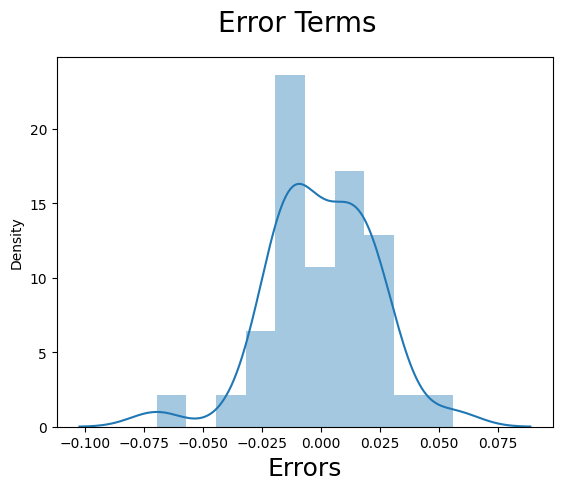

Text(0, 0.5, 'y_pred')

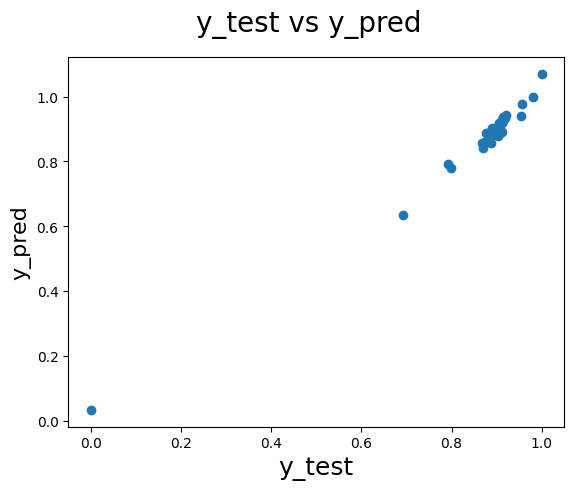

In [652]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


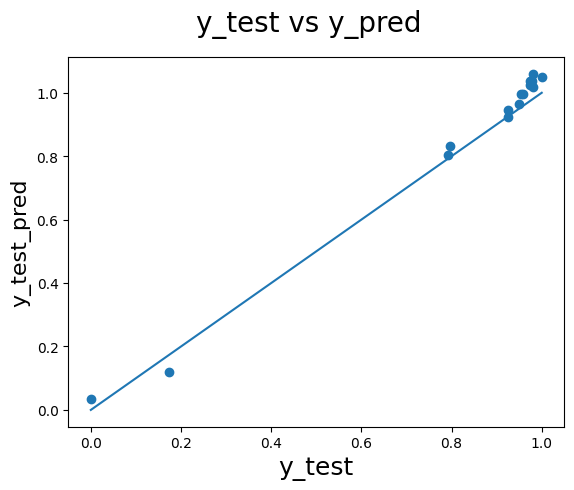

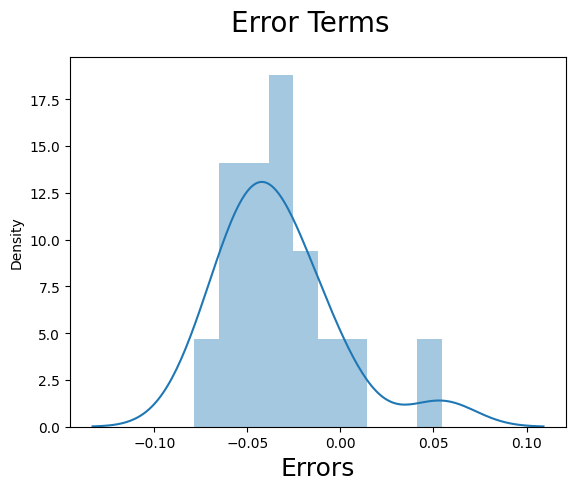

In [653]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


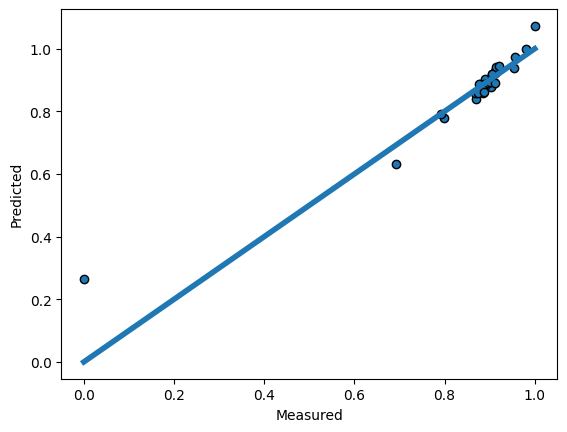

In [654]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()